<div align="center">
  <h1><strong>Credit Risk Analysis Project - ID/X Partners Data Scientist Project Based Internship</strong></h1>
  <h3><strong>Ahmad Fauzi</strong></h3>
</div>

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

sns.set(style="whitegrid")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the dataset and the data dictionary
loan_data = 'loan_data_2007_2014.csv'

# Read the loan data
data = pd.read_csv(loan_data)
data.head()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_13920\1329853848.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(loan_data)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and f

---
# **> DATA UNDERSTANDING**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## **Dataset Overview**
The dataset consists of loan records with a total of 466,285 entries and 75 columns. Each row represents a unique loan record with various attributes describing the loan details, borrower information, and loan status.


In [4]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
data.describe(exclude=['int64', 'float64'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [6]:
total_cells = data.shape[0]

missing_values = data.isnull().sum()
missing_percentage = (missing_values / total_cells) * 100
missing_percentage = missing_percentage.round(4)

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

missing_info = missing_info.sort_values(by='Missing Values', ascending=False)

missing_info.head(40)

,Missing Values,Missing Percentage (%)
inq_last_12m,466285,100.0000
total_bal_il,466285,100.0000
dti_joint,466285,100.0000
verification_status_joint,466285,100.0000
annual_inc_joint,466285,100.0000
open_acc_6m,466285,100.0000
open_il_6m,466285,100.0000
open_il_12m,466285,100.0000
open_il_24m,466285,100.0000
mths_since_rcnt_il,466285,100.0000



## **Data Understanding: Summary of Missing Values**

### Features with Missing Values Analysis

- **100% Missing Values:**
  - These features have no non-missing values and are candidates for removal or imputation strategies if data can be recovered:
    - `annual_inc_joint`, `dti_joint`, `verification_status_joint`, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `total_bal_il`, `il_util`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`, `all_util`, `inq_fi`, `total_cu_tl`, `inq_last_12m`

- **Over 50% Missing Values:**
  - These features may need careful consideration before use due to significant missing data:
    - `desc` (72.98%), `mths_since_last_delinq` (53.69%), `mths_since_last_record` (86.57%), `mths_since_last_major_derog` (78.77%)

- **40% to 50% Missing Values:**
  - These features may need careful consideration before use due to significant missing data:
    - `next_pymnt_d` (48.73%)

- **1% to 20% Missing Values:**
  - Features with moderate missing data:
    - `emp_title` (5.92%), `emp_length` (4.51%), `tot_coll_amt` (15.07%), `tot_cur_bal` (15.07%)

- **0.1% to 1% Missing Values:**
  - Features with low missing data:
    - `last_pymnt_d` (0.0806%), `revol_util` (0.0729%), `collections_12_mths_ex_med` (0.0311%), `last_credit_pull_d` (0.0090%), `inq_last_6mths` (0.0062%), `earliest_cr_line` (0.0062%), `delinq_2yrs` (0.0062%), `open_acc` (0.0062%), `pub_rec` (0.0062%), `acc_now_delinq` (0.0062%), `total_acc` (0.0062%), `title` (0.0045%), `annual_inc` (0.0009%)

### Features with No Missing Values (0%):
- `application_type`, `policy_code`, `collection_recovery_fee`, `last_pymnt_amnt`, `Unnamed: 0`, `recoveries`, `total_rec_late_fee`, `member_id`, `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `term`, `int_rate`, `installment`, `grade`, `sub_grade`, `home_ownership`, `verification_status`, `issue_d`, `loan_status`, `pymnt_plan`, `url`, `purpose`, `zip_code`, `addr_state`, `dti`, `revol_bal`, `initial_list_status`, `id`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `out_prncp`

In [7]:
# Calculate unique values and their percentages by data type
unique_values = data.nunique()
unique_percentage = (unique_values / total_cells) * 100
unique_percentage = unique_percentage.round(4)

# Separate numerical and categorical columns
data_types = data.dtypes
numerical_features = data_types[data_types != 'object'].index
categorical_features = data_types[data_types == 'object'].index

# Create dataframe for unique information
unique_info_numerical = pd.DataFrame({
    'Unique Values': unique_values[numerical_features],
    'Unique Percentage (%)': unique_percentage[numerical_features]
})
unique_info_numerical = unique_info_numerical.sort_values(by='Unique Values', ascending=False)

# Display unique information for numerical and categorical columns
print("Unique Information for Numerical Columns:")
unique_info_numerical

Unique Information for Numerical Columns:


,Unique Values,Unique Percentage (%)
Unnamed: 0,466285,100.0000
member_id,466285,100.0000
id,466285,100.0000
total_pymnt,351609,75.4065
total_pymnt_inv,347659,74.5593
total_rec_int,270249,57.9579
tot_cur_bal,220690,47.3294
last_pymnt_amnt,198194,42.5049
total_rec_prncp,172713,37.0402
out_prncp_inv,141189,30.2796


In [8]:
unique_info_categorical = pd.DataFrame({
    'Unique Values': unique_values[categorical_features],
    'Unique Percentage (%)': unique_percentage[categorical_features]
})
unique_info_categorical = unique_info_categorical.sort_values(by='Unique Values', ascending=False)
print("\nUnique Information for Categorical Columns:")
unique_info_categorical


Unique Information for Categorical Columns:


,Unique Values,Unique Percentage (%)
url,466285,100.0000
emp_title,205475,44.0664
desc,124435,26.6865
title,63098,13.5321
zip_code,888,0.1904
earliest_cr_line,664,0.1424
last_credit_pull_d,103,0.0221
next_pymnt_d,100,0.0214
last_pymnt_d,98,0.0210
issue_d,91,0.0195


## **Data Understanding: Summary of Unique Values**

#### Numerical Columns:
1. **Unnamed: 0, member_id, id:**
   - All unique values, likely serve as unique identifiers without predictive information.

2. **policy_code:**
   - Single unique value, no variation in the dataset, hence not useful for prediction.

#### Categorical Columns:
1. **url:**
   - All unique values, providing no additional relevant information for prediction.

2. **emp_title, desc:**
   - Many unique values, challenging to extract predictive insights.

3. **title:**
   - Significant unique values, but may lack specificity for loan status prediction.

4. **zip_code, addr_state:**
   - Geographic information, potentially less directly relevant for distinguishing good vs. bad loans.

5. **policy_code:**
   - Single unique value, no variation in the dataset, hence not useful for prediction.

6. **application_type:**
   - Single value, offering limited variation for prediction.

7. **grade, term, home_ownership, verification_status:**
   - Limited unique values, but potentially informative for loan status prediction.

### Conclusion
Based on the analysis, columns such as `url`, `Unnamed: 0`, `member_id`, `id`, `emp_title`, `desc`, `zip_code`, `addr_state`, `title`, `policy_code`, and `application_type`, may be considered less useful for predicting loan status (good or bad loan). Columns like `grade`, `term`, `home_ownership`, and `verification_status` could potentially provide useful insights despite their limited variation.

---

# **> Data Preparation #1**

### **Handling Missing Values (Drop OR Imputation)**

- #### Reasons for Dropping Columns with > 40% Missing Values
    Columns such as `annual_inc_joint`, `dti_joint`, `verification_status_joint`, and others have over 40% missing values. The large proportion of missing data indicates that these columns may not provide sufficient information for analysis or modeling purposes. By dropping these columns, we can focus on preserving data integrity and ensuring that our analysis is based on more complete and reliable information.


In [9]:
# Filter columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index.tolist()

# Drop columns with more than 40% missing values from the dataframe
data.drop(columns_to_drop, axis=1, inplace=True)

- ### Reasons for Imputation Approach
    Imputing missing values using median for numeric columns and mode for categorical columns (< 20% missing) ensures that we preserve data integrity and maintain as much information as possible for analysis, minimizing data loss.

In [10]:
# Impute missing values for numeric columns (< 20% missing)
numerical_features = data.select_dtypes(include='number').columns
for col in numerical_features:
    missing_percentage = (data[col].isnull().sum() / len(data)) * 100
    if missing_percentage > 0 and missing_percentage < 20:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)

# Impute missing values for categorical columns (< 20% missing)
categorical_features = data.select_dtypes(include='object').columns
for col in categorical_features:
    missing_percentage = (data[col].isnull().sum() / len(data)) * 100
    if missing_percentage > 0 and missing_percentage < 20:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)


All missing values have been imputed using appropriate methods, ensuring the dataset is now complete and ready for analysis.

### **Handling Unique Values**

We need to drop several columns that are deemed less relevant or potentially redundant

In [11]:
columns_to_drop = [
    'url', 'Unnamed: 0', 'member_id', 'id', 'emp_title', 'zip_code', 'title',
    'addr_state', 'application_type', 'policy_code'
]

# Drop columns
data = data.drop(columns=columns_to_drop)

In [12]:
columns_to_check = ['grade', 'sub_grade', 'term', 'home_ownership', 'verification_status', 'purpose', 'emp_length', 'pymnt_plan', 'initial_list_status']

for col in columns_to_check:
    unique_values = data[col].unique()
    print(f"Unique values for '{col}':")
    print(unique_values)
    print("")

Unique values for 'grade':
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Unique values for 'sub_grade':
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

Unique values for 'term':
[' 36 months' ' 60 months']

Unique values for 'home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Unique values for 'verification_status':
['Verified' 'Source Verified' 'Not Verified']

Unique values for 'purpose':
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

Unique values for 'emp_length':
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']

Unique values for 'pymnt_plan':
['n' 'y']

Unique values for 'initial_list_status':
['f' 'w']



The 'term' column contains two unique values: ' 36 months' and ' 60 months'. Note that there are leading whitespaces in these values, which should be considered if we plan to use them for analysis or modeling purposes.

In [13]:
data['term'] = data['term'].str.strip()

### **Formatting Datetime**

In [14]:
# List of date columns
date_columns = ['earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d', 'issue_d']

data[date_columns].head()

,earliest_cr_line,last_credit_pull_d,last_pymnt_d,issue_d
0,Jan-85,Jan-16,Jan-15,Dec-11
1,Apr-99,Sep-13,Apr-13,Dec-11
2,Nov-01,Jan-16,Jun-14,Dec-11
3,Feb-96,Jan-15,Jan-15,Dec-11
4,Jan-96,Jan-16,Jan-16,Dec-11


In [15]:
# Convert all date columns to datetime format
for col in date_columns:
    data[col] = pd.to_datetime(data[col], format='%b-%y')

data[date_columns].head()

,earliest_cr_line,last_credit_pull_d,last_pymnt_d,issue_d
0,1985-01-01,2016-01-01,2015-01-01,2011-12-01
1,1999-04-01,2013-09-01,2013-04-01,2011-12-01
2,2001-11-01,2016-01-01,2014-06-01,2011-12-01
3,1996-02-01,2015-01-01,2015-01-01,2011-12-01
4,1996-01-01,2016-01-01,2016-01-01,2011-12-01


In [16]:
# Feature engineering: Credit age in years
data['credit_age_years'] = (data['issue_d'] - data['earliest_cr_line']).dt.days

# Feature engineering: Days since last credit pull
data['days_since_last_credit_pull'] = (data['last_credit_pull_d'] - data['issue_d']).dt.days

# Feature engineering: Days since last payment
data['days_since_last_payment'] = (data['issue_d'] - data['last_pymnt_d']).dt.days

In [17]:
# Drop the specified columns from your DataFrame
data.drop(['earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d', 'issue_d'], axis=1, inplace=True)

Reasons for Dropping Features:
   - **Issue**: Datetime features like `earliest_cr_line`, `last_credit_pull_d`, `last_pymnt_d`, and `issue_d` cannot be directly used for modeling without conversion to numeric or categorical formats.
   - **Solution**: To simplify data preprocessing and modeling, these datetime features are dropped from the dataset.

### **Formatting Target Feature (Loan Status)**

In [18]:
data['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

C:\Users\ahmad\AppData\Local\Temp\ipykernel_13920\1792295692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='loan_status', data=data, order=data['loan_status'].value_counts().index, palette='pastel')


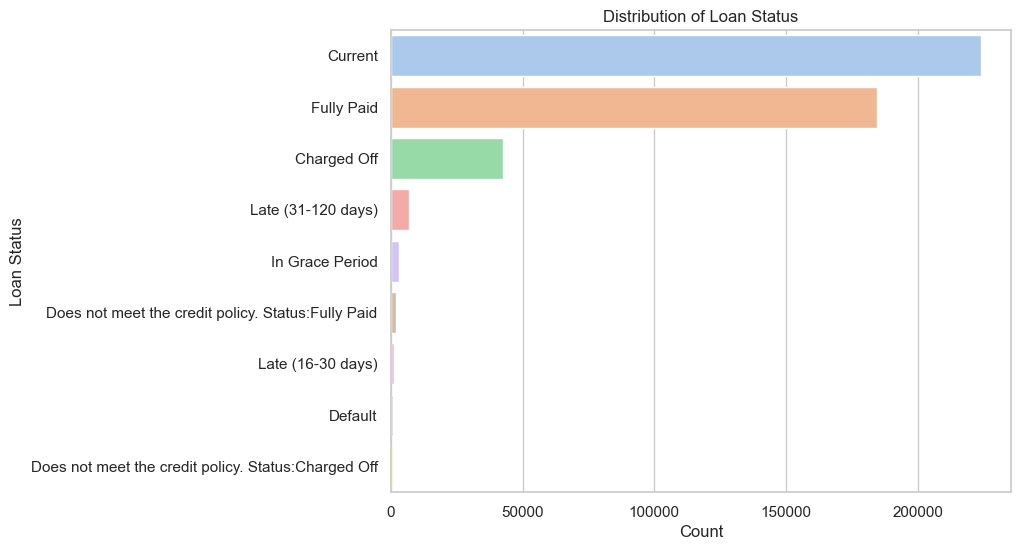

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(y='loan_status', data=data, order=data['loan_status'].value_counts().index, palette='pastel')
plt.title('Distribution of Loan Status')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

1. **Fully Paid**:
   - **Definition**: Loans that have been completely paid off with no missed payments.
   - **Reason**: Classified as "good loans" because they have been fully repaid according to the contract terms.

2. **Charged Off**:
   - **Definition**: Loans that are deemed unlikely to be fully repaid and are written off as a loss by the creditor.
   - **Reason**: Classified as "bad loans" because the borrower has failed to repay the loan.

3. **Current**:
   - **Definition**: Loans that are active and payments are being made on time.
   - **Reason**: Classified as "good loans" because payments are being made as scheduled.

4. **Default**:
   - **Definition**: Loans that have failed to be repaid and the borrower has not fulfilled the terms of the loan agreement.
   - **Reason**: Classified as "bad loans" because they have defaulted and are considered non-performing.

5. **Late (31-120 days)**:
   - **Definition**: Loans with payments that are overdue by 31 to 120 days.
   - **Reason**: Classified as "bad loans" due to significant payment delays.

6. **In Grace Period**:
   - **Definition**: Loans that are in a grace period where payments can still be made without penalty.
   - **Reason**: Classified as "bad loans" because they have missed the payment due date.

7. **Late (16-30 days)**:
   - **Definition**: Loans with payments that are overdue by 16 to 30 days.
   - **Reason**: Classified as "bad loans" due to payment delays, though not as severe as those overdue by 31-120 days.

8. **Does not meet the credit policy. Status:Fully Paid**:
   - **Definition**: Loans that do not meet the credit underwriting policy but have been fully paid.
   - **Reason**: Classified as "good loans" because they have been repaid despite not meeting the credit policy.

9. **Does not meet the credit policy. Status:Charged Off**:
   - **Definition**: Loans that do not meet the credit underwriting policy and are unlikely to be fully repaid.
   - **Reason**: Classified as "bad loans" because they not only fail to meet the credit policy but also end up not being fully repaid.

In [20]:
# Define the mapping dictionary
status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0,
    'Current': 1,
    'Default': 0,
    'Late (31-120 days)': 0,
    'In Grace Period': 0,
    'Late (16-30 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 0
}

# Create a new column 'loan_condition' based on the mapping
data['loan_condition'] = data['loan_status'].map(status_mapping)

The column 'loan_status' has been mapped to a new column 'loan_condition' based on predefined categories of 'Good' and 'Bad'. This mapping categorizes loans as follows:
- 'Good': Includes loans that are fully paid or are current.
- 'Bad': Includes loans that have been charged off, are in default, are late on payments, or do not meet the credit policy.

In [21]:
data.drop('loan_status', axis=1, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   466285 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466285 non-null  float64
 11  verification_status          466285 non-null  object 
 12  pymnt_plan                   466285 non-null  object 
 13 

---

## **> Exploratory Data Analysis (EDA)**

In [23]:
# Filter numerical and categorical features that are still present in the DataFrame after data cleaning!
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

### **Correlation Analysis and Multicollinearity Reduction**

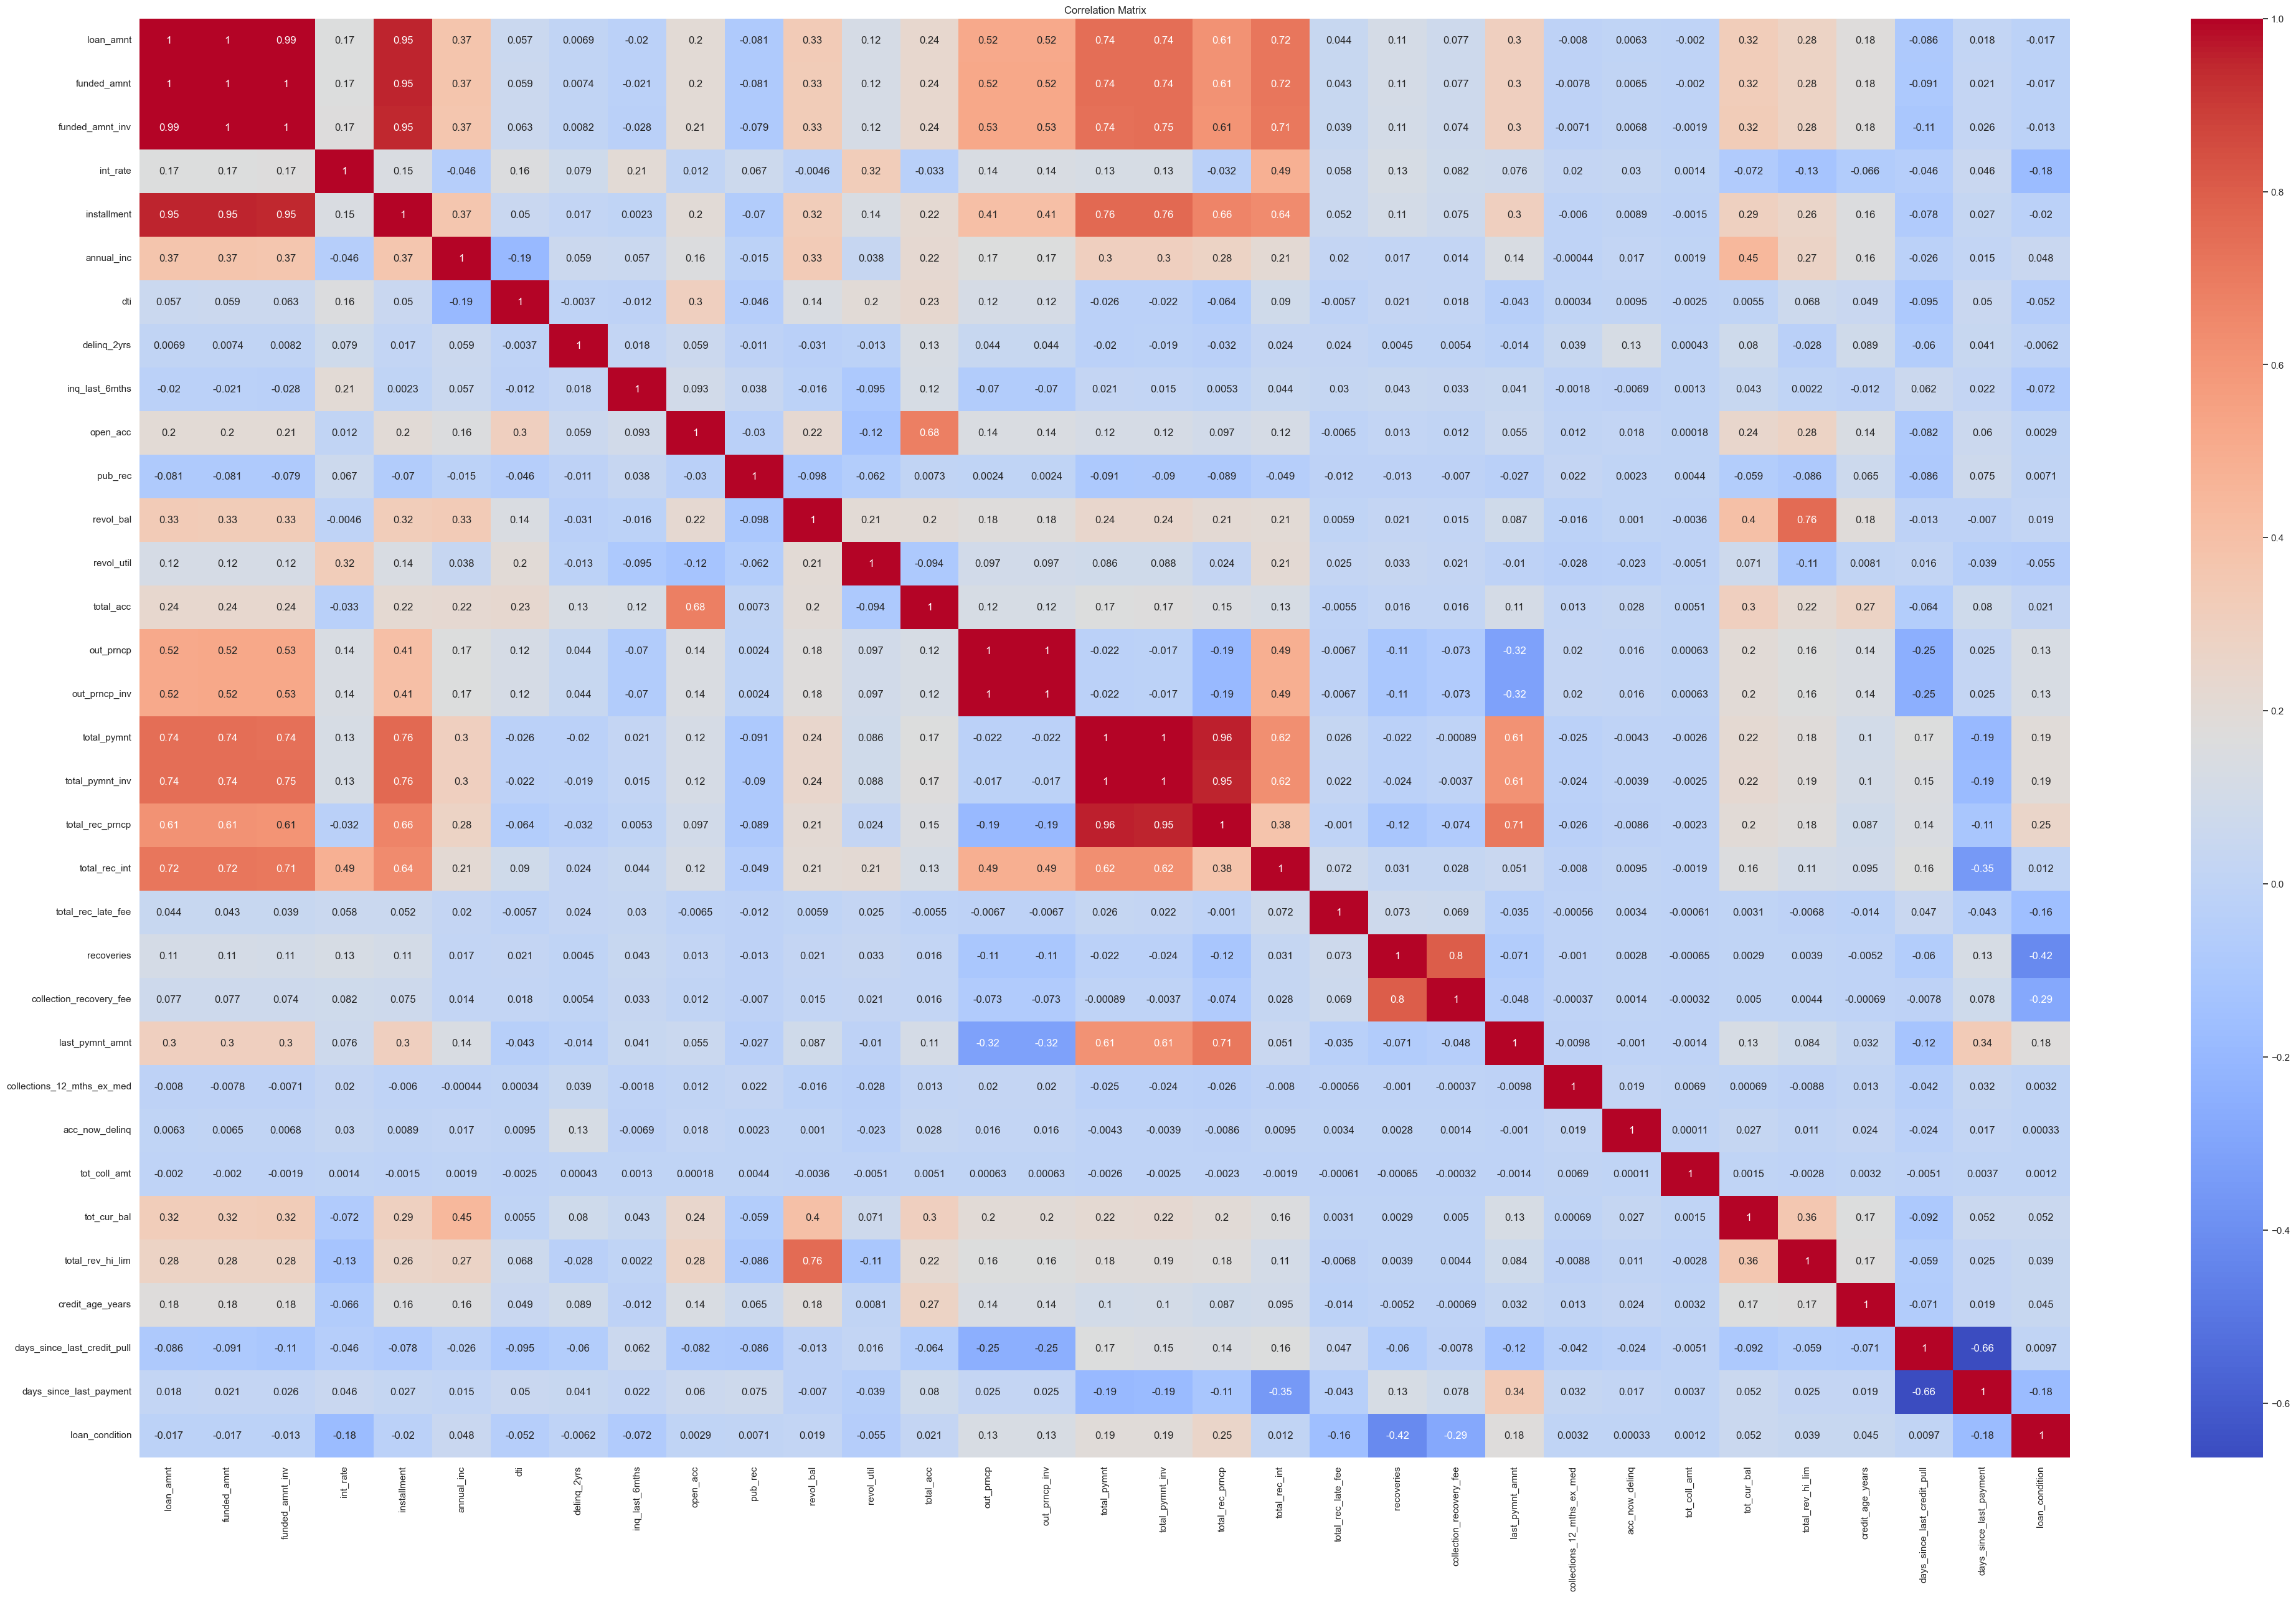

In [24]:
plt.figure(figsize=(50, 30))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Filter the correlation matrix to include only correlations above 0.8 (and below 1.0 to exclude self-correlations)
high_correlation = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix < 1.0)]

# Find pairs of features with correlation greater than 0.8
high_correlation_pairs = high_correlation.unstack().dropna().sort_values(ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs > 0.8]

# Convert to DataFrame for better visualization
high_correlation_pairs_df = pd.DataFrame(high_correlation_pairs).reset_index()
high_correlation_pairs_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_pairs_df

,Feature 1,Feature 2,Correlation
0,out_prncp,out_prncp_inv,0.999998
1,out_prncp_inv,out_prncp,0.999998
2,loan_amnt,funded_amnt,0.998548
3,funded_amnt,loan_amnt,0.998548
4,funded_amnt,funded_amnt_inv,0.996125
5,funded_amnt_inv,funded_amnt,0.996125
6,total_pymnt_inv,total_pymnt,0.995862
7,total_pymnt,total_pymnt_inv,0.995862
8,funded_amnt_inv,loan_amnt,0.994347
9,loan_amnt,funded_amnt_inv,0.994347


Why Care About High Correlation?

- **Instability in Model Estimates**: High multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome variable.
- **Redundancy**: Highly correlated features provide similar information, which may not add value to the model and can increase complexity unnecessarily.

Based on the high correlation pairs identified earlier, we will remove the following redundant features to reduce multicollinearity and improve model performance:

- `out_prncp_inv`: Highly correlated with `out_prncp`.
- `funded_amnt` and `funded_amnt_inv`: Highly correlated with `loan_amnt`.
- `total_pymnt_inv`: Highly correlated with `total_pymnt`.
- `total_rec_prncp`: Highly correlated with `total_pymnt`.
- `installment`: Highly correlated with `loan_amnt`.
- `collection_recovery_fee`: Highly correlated with `recoveries`.

By dropping these columns, we aim to simplify our dataset and avoid potential issues arising from multicollinearity.

In [26]:
# Define columns to drop based on high correlation pairs
columns_to_drop = [
    'out_prncp_inv', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv', 
    'total_rec_prncp', 'installment', 'collection_recovery_fee'
]

# Drop columns
data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the updated DataFrame
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_age_years,days_since_last_credit_pull,days_since_last_payment,loan_condition
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,9830,1492,-1127,1
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,0.0,81539.0,22800.0,4627,640,-487,0
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,3682,1492,-913,1
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,5782,1127,-1127,1
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,n,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,5813,1492,-1492,1


### **Distribution of Numerical Features**

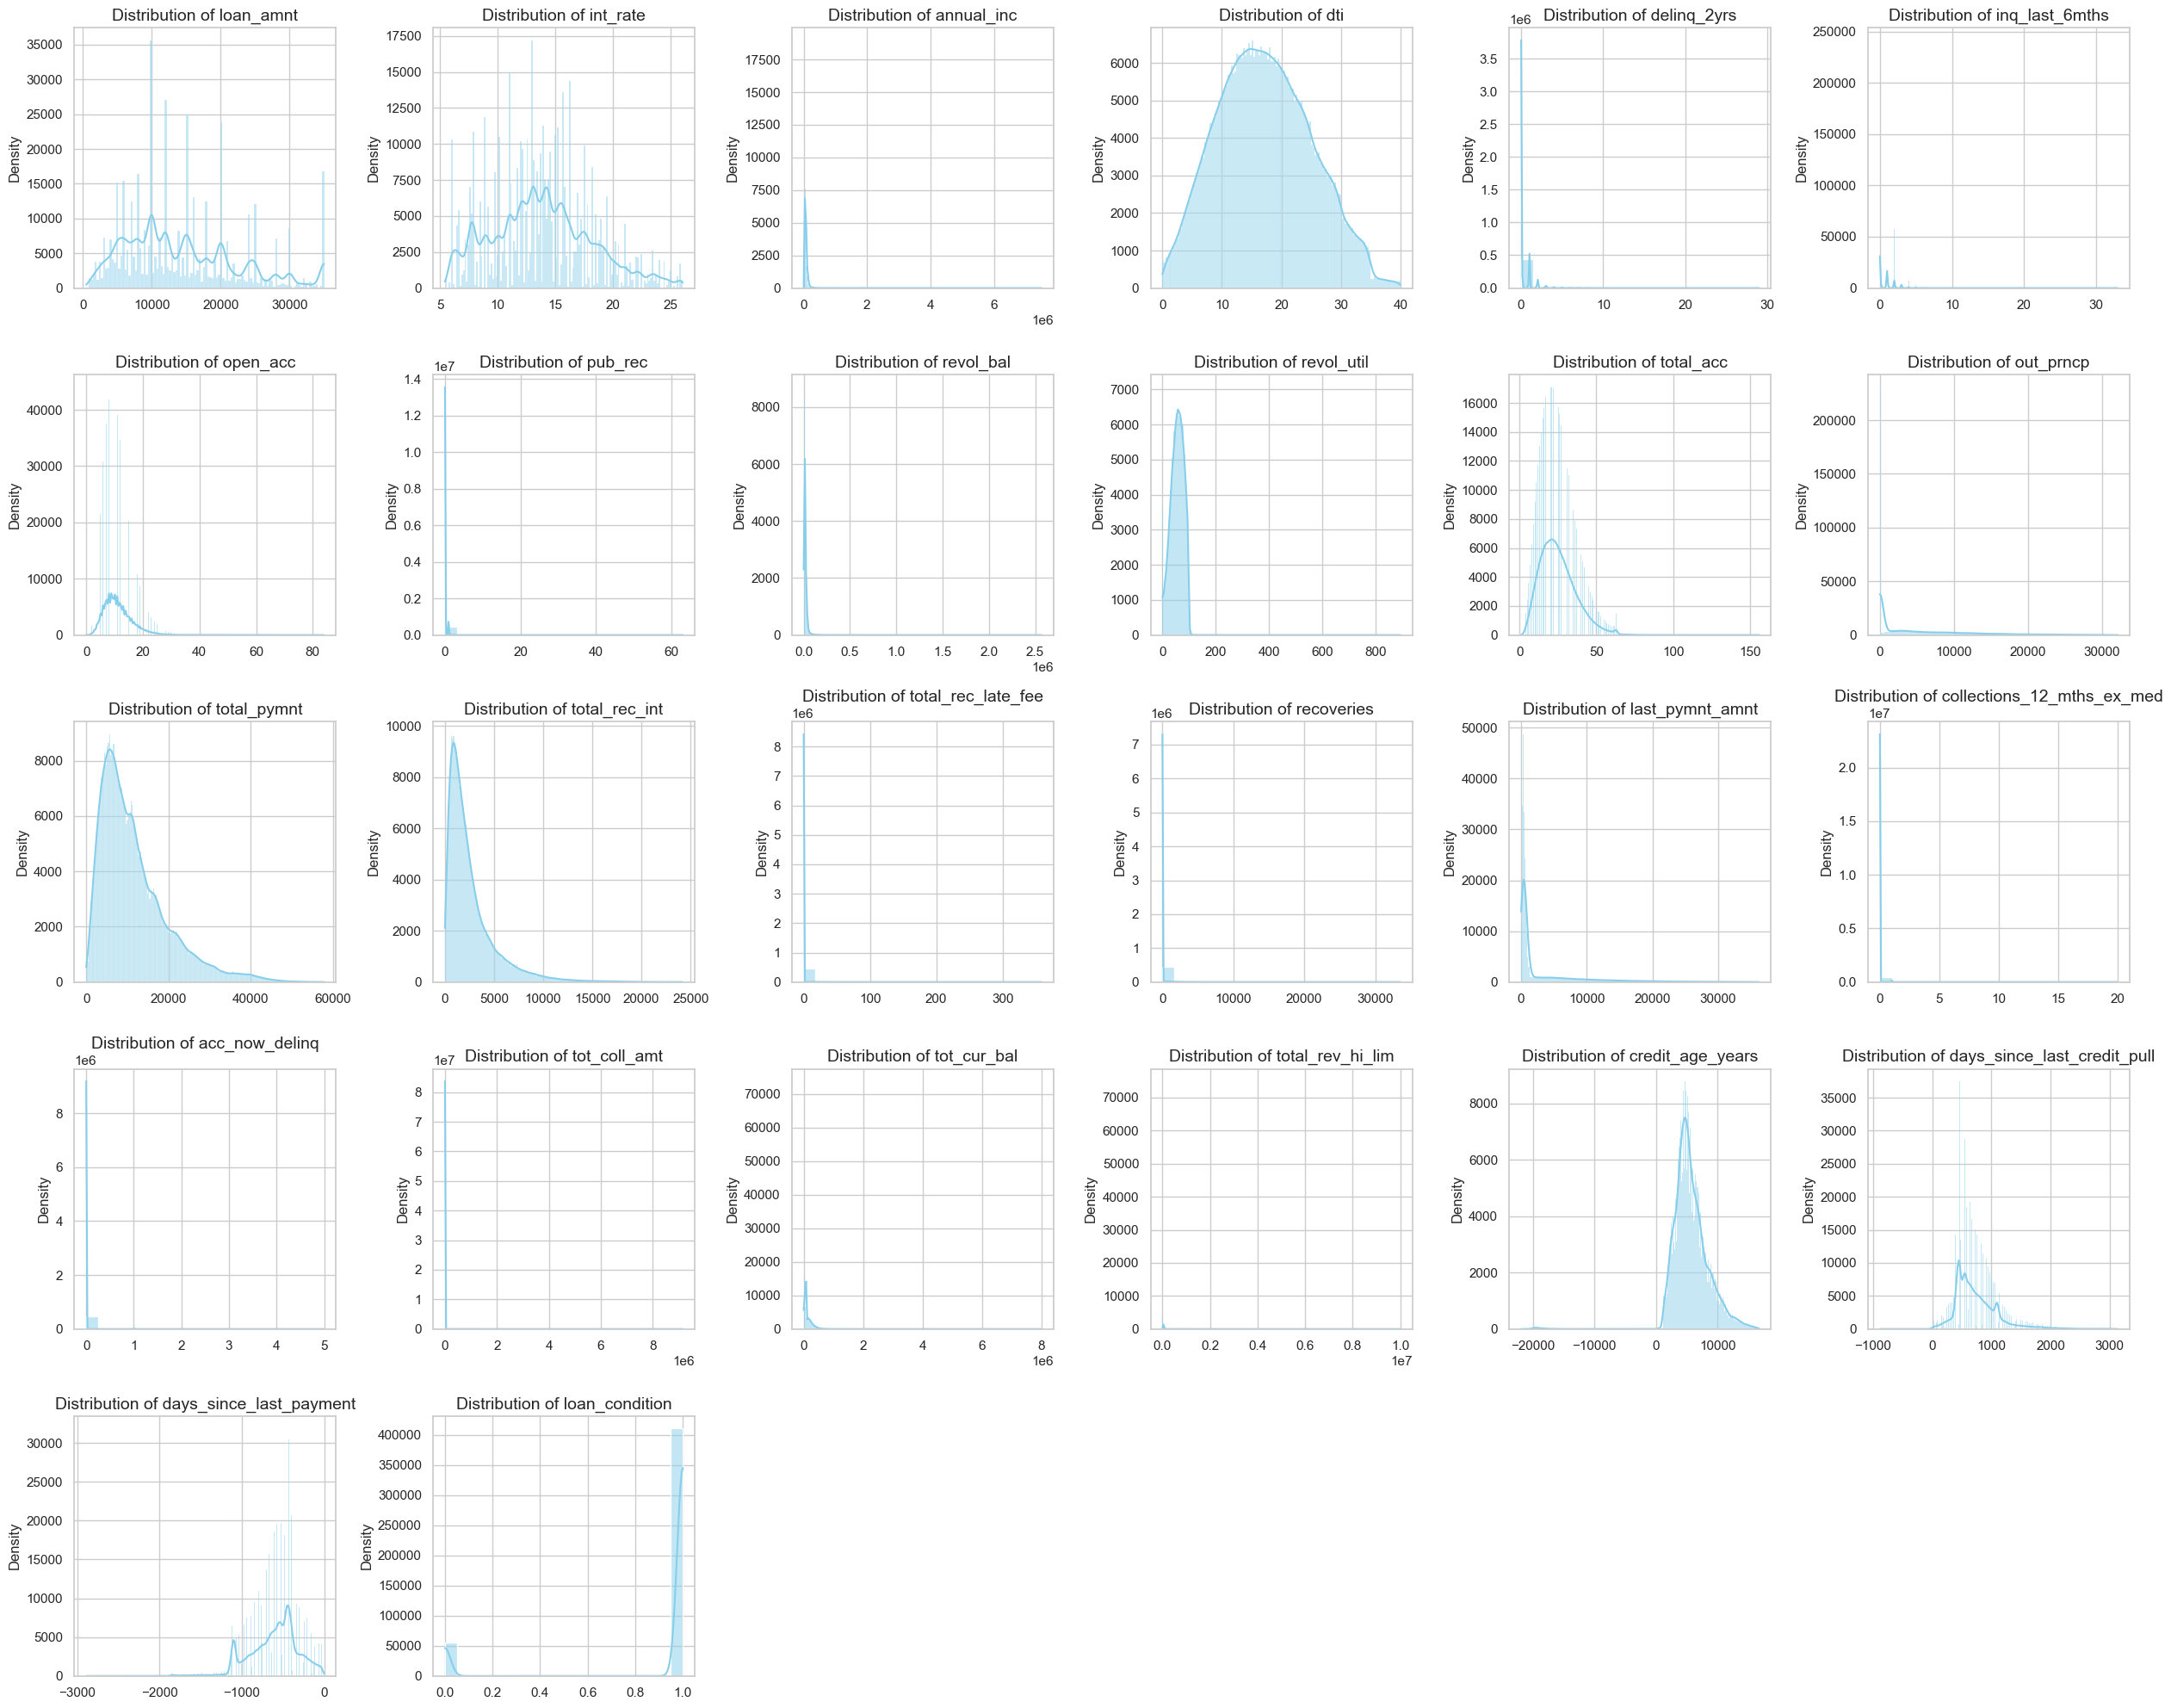

In [27]:
# Filter numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate number of subplots needed
num_plots = len(numerical_features)

# Determine number of rows and columns for subplots
cols = 6
rows = num_plots // cols
if num_plots % cols != 0:
    rows += 1

# Define figure and axes
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 4 * rows))
axes = axes.flatten()

# Loop through numerical features and create distribution plots
for i, col in enumerate(numerical_features):
    if i < num_plots: 
        sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Density')

# Remove any unused axes
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The visualizations below show the distributions of several different variables. Many distributions exhibit **extreme high skewness**. Here are some recommended actions:

1. **Data Transformation**: Many distributions have high skewness, which can be mitigated with data transformations like log transformation or square root transformation.
   
2. **Normalization or Standardization**: For variables with very different ranges, normalization or standardization can help reduce skewness and make the data more suitable for further analysis like regression or clustering.

3. **Outlier Handling**: Some distributions show significant outliers. Outliers can greatly affect analysis results, so consider handling them with methods like winsorizing or trimming.

4. **Box-Cox Transformation**: For highly skewed distributions, Box-Cox transformation can be used to reduce skewness and make the data closer to a normal distribution.


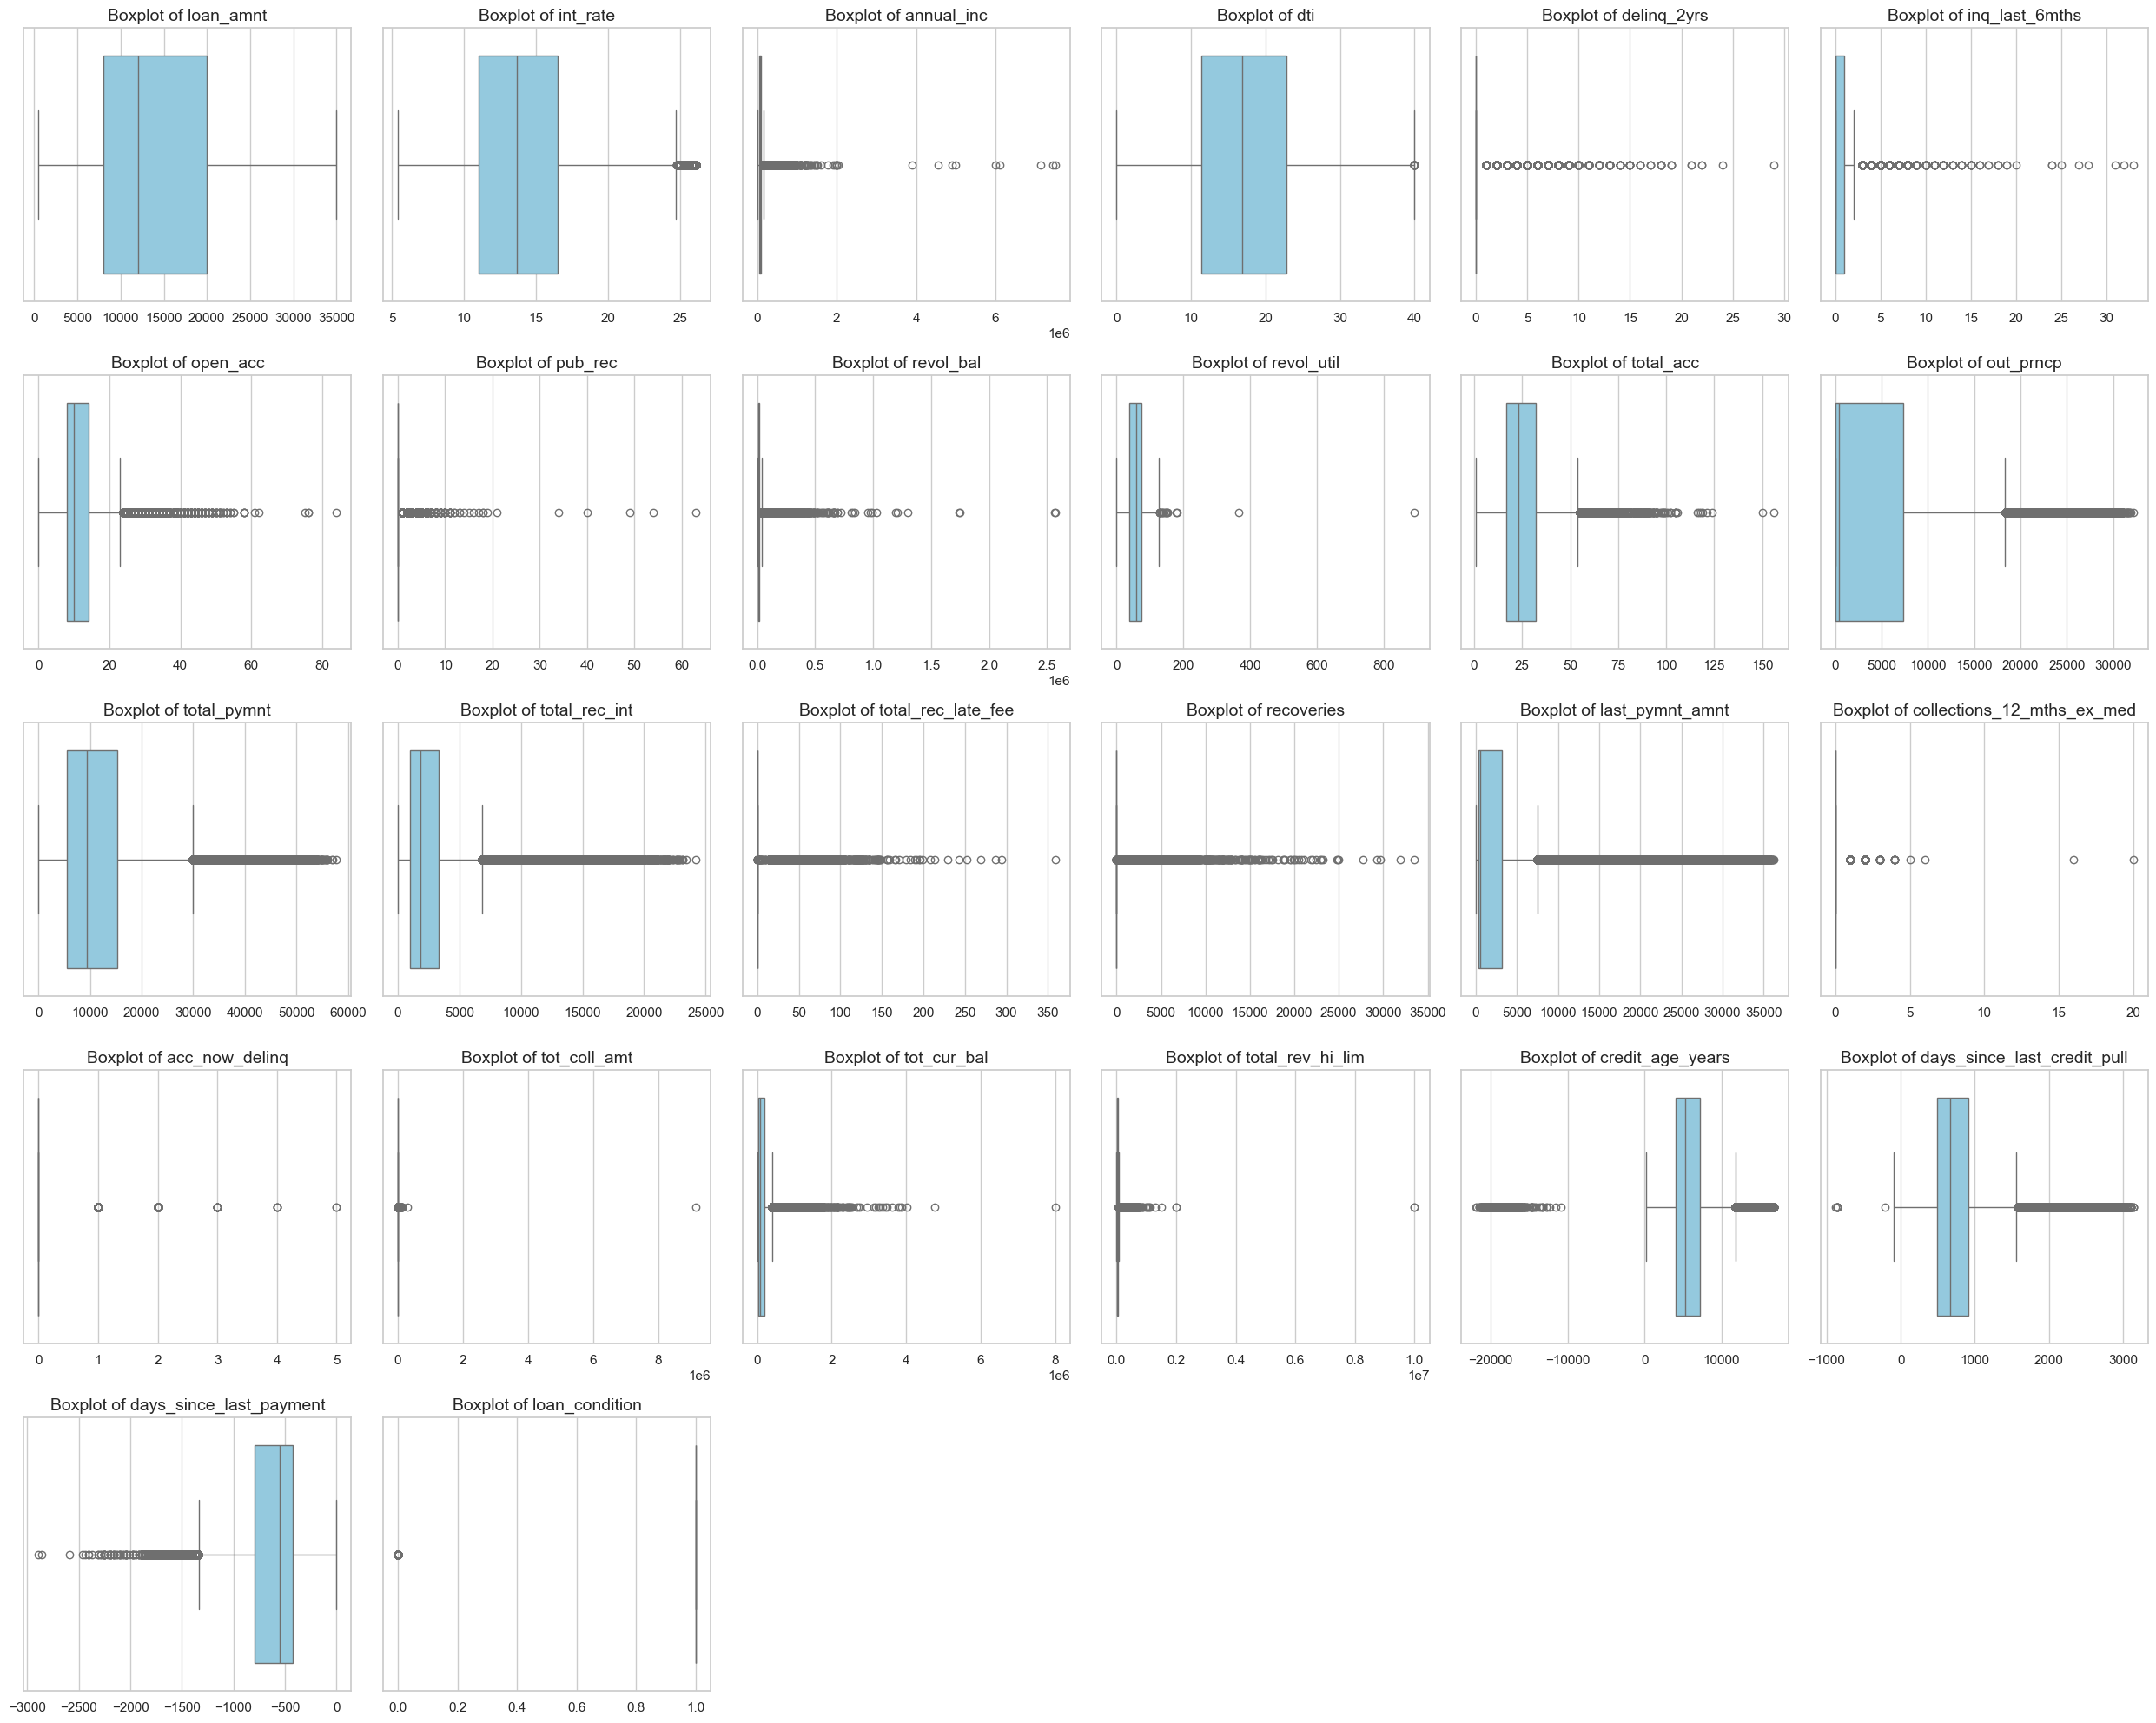

In [28]:
# Define figure and axes
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 4 * rows))
axes = axes.flatten()

# Loop through numerical features and create boxplots
for i, col in enumerate(numerical_features):
    if i < num_plots:
        sns.boxplot(x=data[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Remove any unused axes
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

1. **Central Tendency and Dispersion**:
   - Most features have a central tendency with interquartile ranges indicating a spread of the middle 50% of the data.
   - For example, the loan amount, interest rate, and debt-to-income ratio have noticeable central values and spreads.

2. **Outliers**:
   - Several features exhibit significant outliers. 
   - Annual income, delinquency in the past 2 years, total payments, and total current balance are notable for having extreme outliers.
   - Outliers suggest there are borrowers with unusually high or low values compared to the majority.

3. **Distribution Shape**:
   - Many features are right-skewed, indicating a concentration of data points at the lower end with a tail extending to the higher values.
   - Features like annual income, total payments, and total current balance exhibit this pattern prominently.

4. **Sparsely Populated Features**:
   - Certain features like collections in the last 12 months and total collection amount have many zero or near-zero values, indicating that most borrowers do not have collections.

### **Distribution of Loan Status**

In [29]:
data['loan_condition'].dtype

dtype('int64')

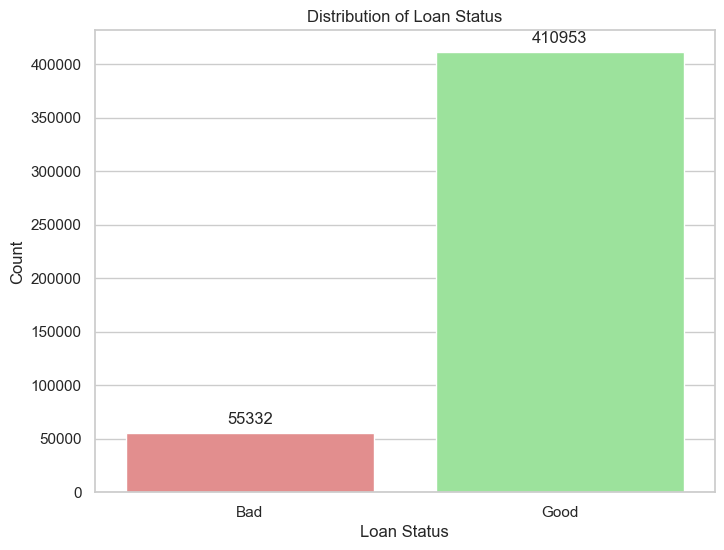

In [30]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_condition', data=data, hue='loan_condition', palette={1: 'lightgreen', 0: 'lightcoral'}, legend=False)

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Bad', 'Good'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

The dataset **imbalance**, where there are significantly more good loans than bad loans, may affect model performance. Consider addressing this with techniques like SMOTE (Synthetic Minority Over-sampling Technique).

### **Loan Status by Grade & Sub Grade**

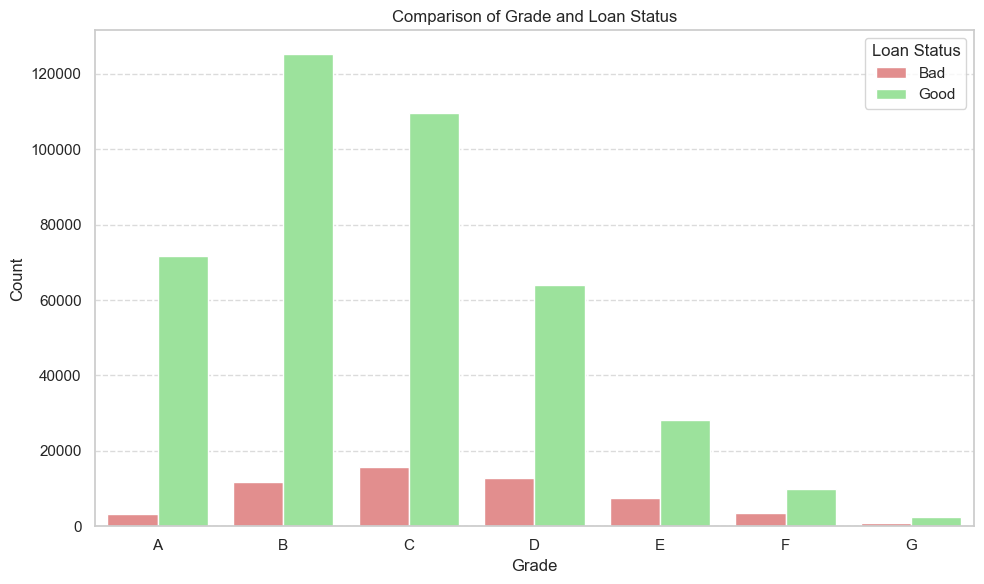

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_condition', data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette={1: 'lightgreen', 0: 'lightcoral'})
plt.title('Comparison of Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loan Status', loc='upper right', labels=['Bad', 'Good'])
plt.tight_layout()
plt.show()

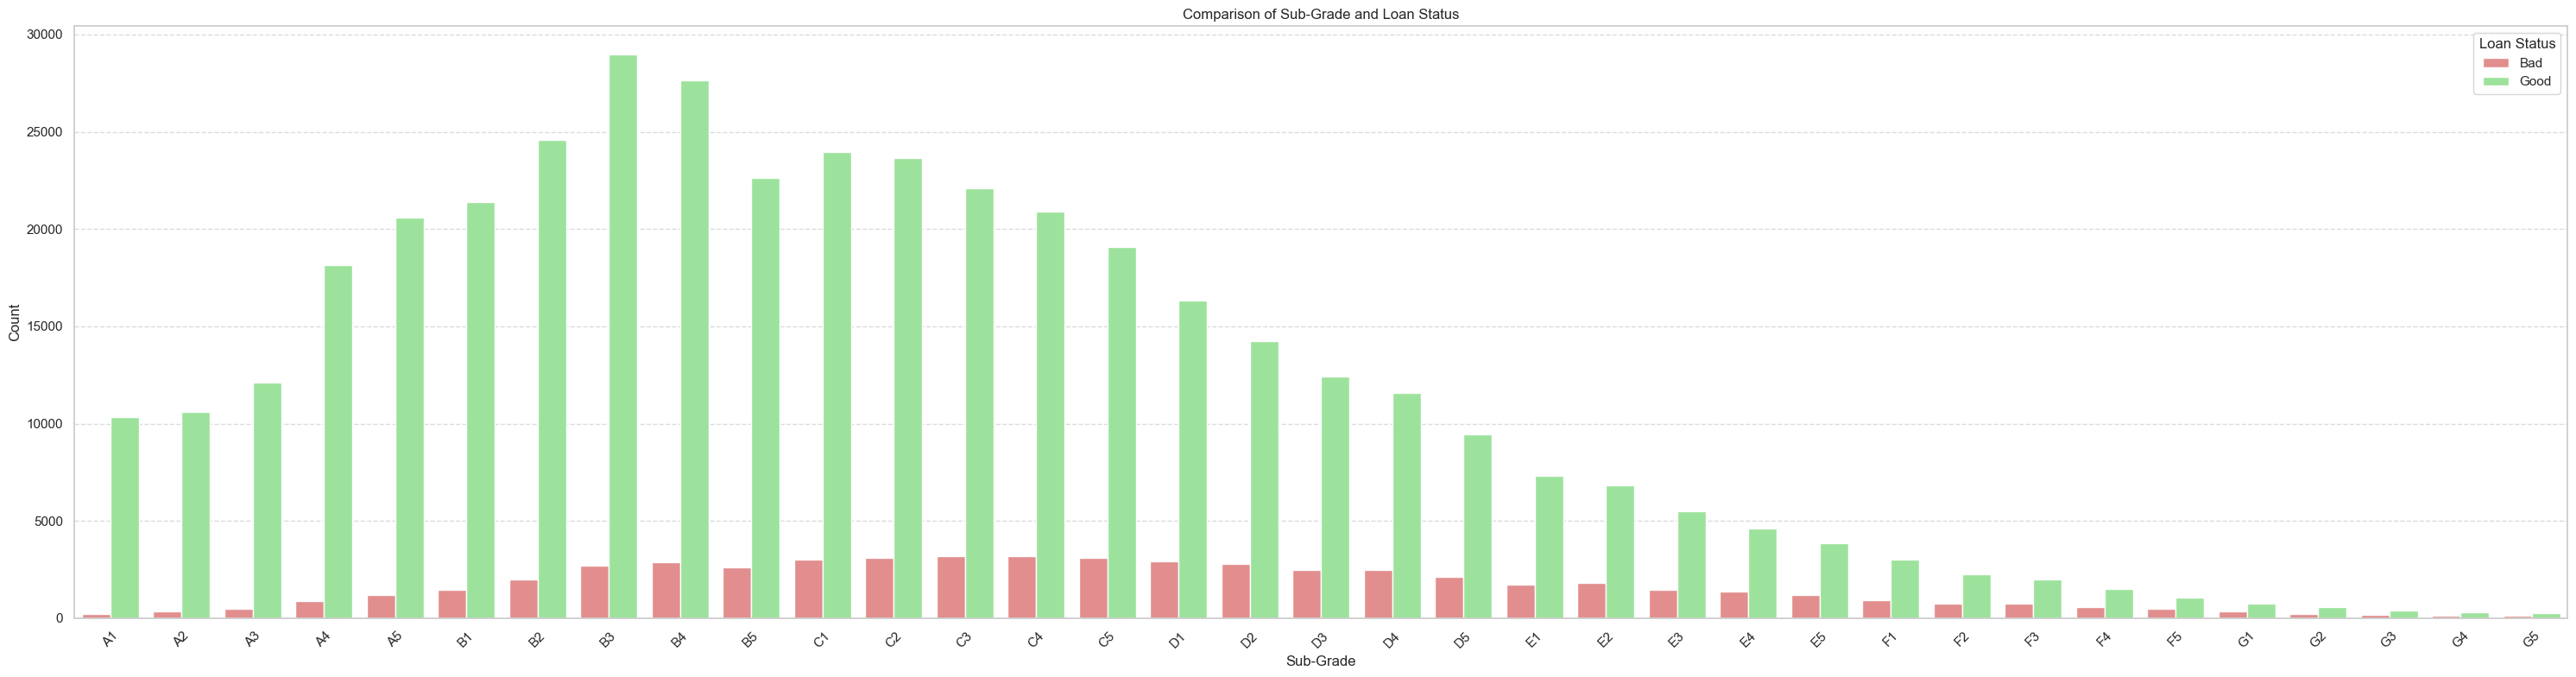

In [32]:
sub_grade_order = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5',
    'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5'
]

# Plotting
plt.figure(figsize=(30, 8))
sns.countplot(x='sub_grade', hue='loan_condition', data=data, order=sub_grade_order, palette={1: 'lightgreen', 0: 'lightcoral'})
plt.title('Comparison of Sub-Grade and Loan Status')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loan Status', loc='upper right', labels=['Bad', 'Good'])
plt.tight_layout()
plt.show()

The data reveals a varying distribution of loan status across different grades and sub grades, indicating that lower grades (higher risk categories) tend to have higher proportions of bad loans compared to higher grades.

### **Loan Status by Term**

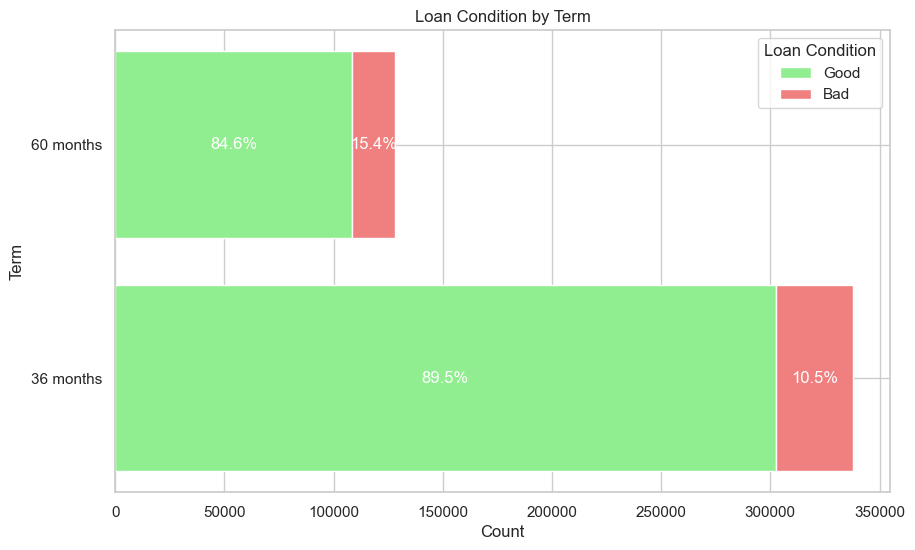

In [33]:
# Calculate frequencies of each term and loan_condition combination
counts = data.groupby(['term', 'loan_condition']).size().unstack()

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(percentages.index, counts[1], color='lightgreen', label='Good')
bars2 = plt.barh(percentages.index, counts[0], left=counts[1], color='lightcoral', label='Bad')

# Adding percentage labels on each stack
for i, bar in enumerate(bars):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
             f'{percentages.iloc[i, 1]:.1f}%', ha='center', va='center', color='white')

for i, bar in enumerate(bars2):
    plt.text(bar.get_width() / 2 + counts[1].iloc[i], bar.get_y() + bar.get_height() / 2,
             f'{percentages.iloc[i, 0]:.1f}%', ha='center', va='center', color='white')

plt.title('Loan Condition by Term')
plt.xlabel('Count')
plt.ylabel('Term')
plt.legend(title='Loan Condition', loc='upper right', labels=['Good', 'Bad'])
plt.show()

### **Loan Status by Employment Length**

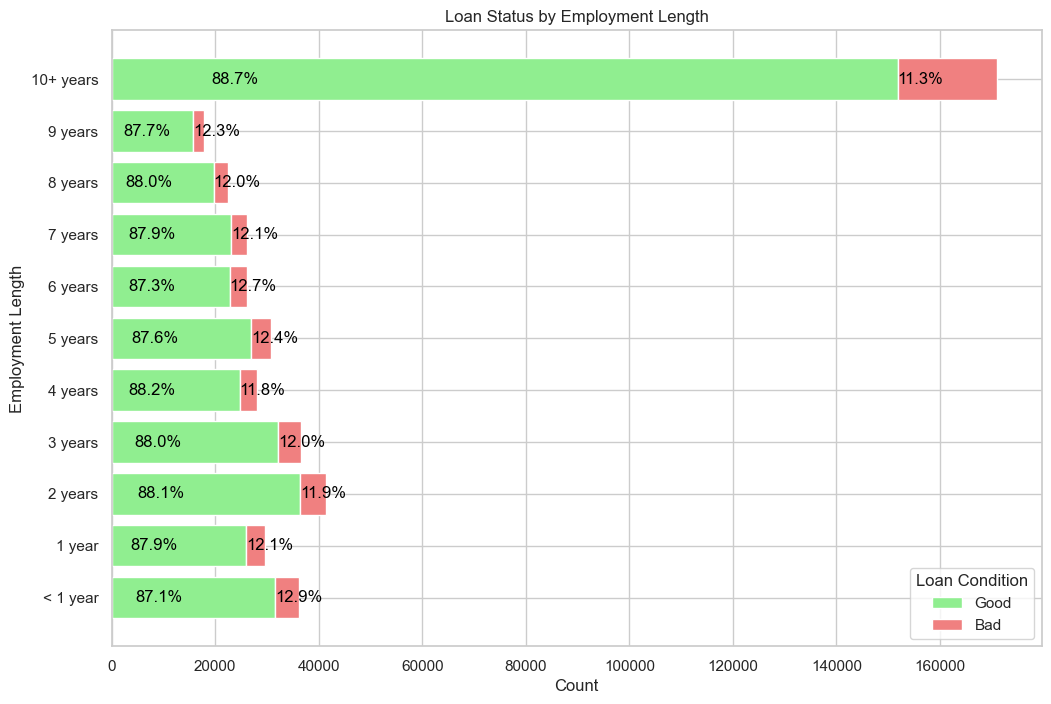

In [34]:
# Calculate frequencies of each emp_length and loan_condition combination
emp_order = ['10+ years', '9 years', '8 years', '7 years', '6 years', '5 years', '4 years', '3 years', '2 years', '1 year', '< 1 year']
counts = data.groupby(['emp_length', 'loan_condition']).size().unstack().reindex(emp_order)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(percentages.index[::-1], counts[1][::-1], color='lightgreen', label='Good')
bars2 = plt.barh(percentages.index[::-1], counts[0][::-1], left=counts[1][::-1], color='lightcoral', label='Bad')

# Adding percentage labels on each stack outside the bars
for i, bar in enumerate(bars2):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{percentages.iloc[::-1, 1].iloc[i]:.1f}%', ha='left', va='center', color='black')

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{percentages.iloc[::-1, 0].iloc[i]:.1f}%', ha='left', va='center', color='black')

plt.title('Loan Status by Employment Length')
plt.xlabel('Count')
plt.ylabel('Employment Length')
plt.legend(title='Loan Condition', loc='lower right')
plt.show()


### **Loan Status by Purpose**

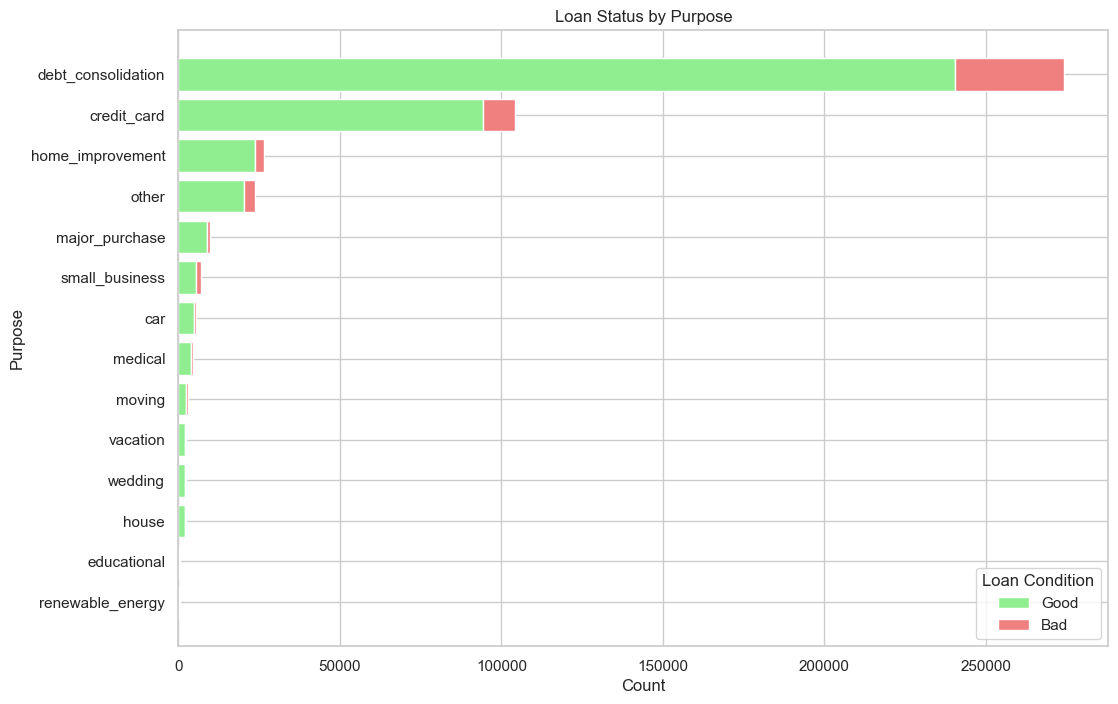

In [35]:
# Calculate frequencies of each purpose and loan_condition combination
purpose_order = data['purpose'].value_counts().index
counts = data.groupby(['purpose', 'loan_condition']).size().unstack().reindex(purpose_order)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(counts.index[::-1], counts[1][::-1], color='lightgreen', label='Good')
bars2 = plt.barh(counts.index[::-1], counts[0][::-1], left=counts[1][::-1], color='lightcoral', label='Bad')

plt.title('Loan Status by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.legend(title='Loan Condition', loc='lower right')
plt.show()


### **Loan Status by Home Ownership**

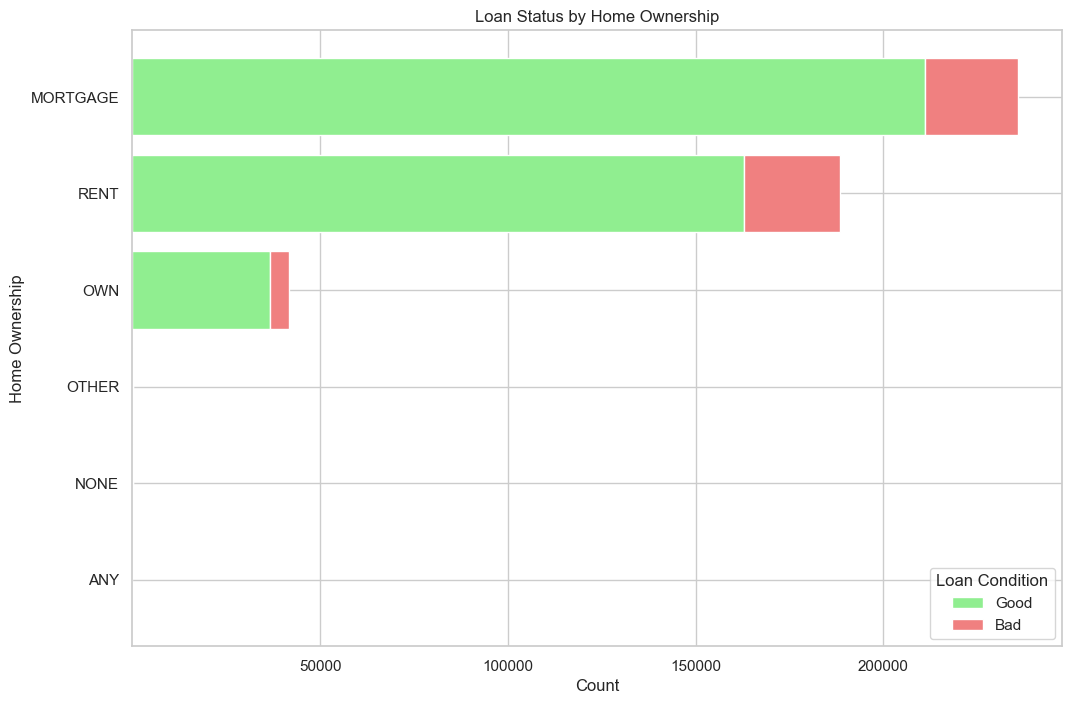

In [36]:
# Calculate frequencies of each home_ownership and loan_condition combination
home_ownership_order = data['home_ownership'].value_counts().index
counts = data.groupby(['home_ownership', 'loan_condition']).size().unstack().reindex(home_ownership_order)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(counts.index[::-1], counts[1][::-1], color='lightgreen', label='Good')
bars2 = plt.barh(counts.index[::-1], counts[0][::-1], left=counts[1][::-1], color='lightcoral', label='Bad')

plt.title('Loan Status by Home Ownership')
plt.xlabel('Count')
plt.ylabel('Home Ownership')
plt.legend(title='Loan Condition', loc='lower right')
plt.show()

---

## **> DATA PREPARATION #2**

### **Categorical Encoding**

In [37]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'],
      dtype='object')

In [38]:
# Get unique values for each categorical column
unique_values = {}
for col in data.select_dtypes(include='object').columns:
    unique_values[col] = data[col].unique()

# Create a dataframe from unique values
unique_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique_Values'])

print("Unique Values per Categorical Column:")
unique_df

Unique Values per Categorical Column:


,Column,Unique_Values
0,term,"[36 months, 60 months]"
1,grade,"[B, C, A, E, F, D, G]"
2,sub_grade,"[B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A1, B3, B4, C2, D2, A3, A5, D5, A2, E4, D3, D4, F3, E3, F4, F1, E5, G4, E2, G3, G2, G1, F5, G5]"
3,emp_length,"[10+ years, < 1 year, 1 year, 3 years, 8 years, 9 years, 4 years, 5 years, 6 years, 2 years, 7 years]"
4,home_ownership,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
5,verification_status,"[Verified, Source Verified, Not Verified]"
6,pymnt_plan,"[n, y]"
7,purpose,"[credit_card, car, small_business, other, wedding, debt_consolidation, home_improvement, major_purchase, medical, moving, vacation, house, renewable_energy, educational]"
8,initial_list_status,"[f, w]"


# Categorical Columns Encoding Plan

1. **term**
   - **Strategy:** One-Hot Encoding
   - **Reasoning:** `term` column has two categorical values: "36 months" and "60 months", which are not ordinal.

2. **grade & sub_grade**
   - **Strategy:** Mapping Manual
   - **Reasoning:** `grade` column represents a categorical variable with an inherent order: "A" < "B" < "C" < "D" < "E" < "F" < "G".

3. **emp_length**
   - **Strategy:** Mapping Manual
   - **Reasoning:** `emp_length` column indicates the length of employment, which can be ordered from "< 1 year" to "10+ years".

4. **home_ownership**
   - **Strategy:** One-Hot Encoding
   - **Reasoning:** `home_ownership` column includes multiple categorical values ("RENT", "OWN", "MORTGAGE", etc.) without a specific order.

5. **verification_status**
   - **Strategy:** One-Hot Encoding
   - **Reasoning:** `verification_status` column has categorical values ("Verified", "Source Verified", "Not Verified") without a specific order.

6. **purpose**
   - **Strategy:** One-Hot Encoding
   - **Reasoning:** `purpose` column contains various categorical values indicating loan purposes, such as "credit_card", "car", "small_business", etc., without a specific order.

7. **initial_list_status**
   - **Strategy:** Label Encoding
   - **Reasoning:** `initial_list_status` column has only two categorical values: "f" (for whole loans) and "w" (for fractional loans).

8. **pymnt_plan**
   - **Strategy:** Label Encoding
   - **Reasoning:** `pymnt_plan` column has two categorical values: "n" (no) and "y" (yes).

By implementing these encoding strategies, each categorical column will be transformed into a format suitable for machine learning models or further analytical tasks, maintaining the integrity and interpretability of the original categorical data.

- Label Encoding

In [39]:
# Columns to be label encoded
label_encoded_columns = ['initial_list_status', 'pymnt_plan']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in label_encoded_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Displaying the encoded DataFrame
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_age_years,days_since_last_credit_pull,days_since_last_payment,loan_condition
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,0,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0,0.0,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,9830,1492,-1127,1
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0,0.0,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,0.0,81539.0,22800.0,4627,640,-487,0
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,0,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0,0.0,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,3682,1492,-913,1
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,0,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0,0.0,12226.302210,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,5782,1127,-1127,1
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,0,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,0,766.9,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,5813,1492,-1492,1


- One-Hot Encoding

In [40]:
# Columns to be one-hot encoded
one_hot_encoded_columns = ['term', 'home_ownership', 'verification_status', 'purpose']

# Extracting columns for one-hot encoding
data_subset = data[one_hot_encoded_columns].copy()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit-transforming the data
encoded_data = encoder.fit_transform(data_subset)

# Getting feature names from encoder categories
encoded_columns = encoder.get_feature_names_out(data_subset.columns)

# Combine encoded data with the rest of the DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=list(encoded_columns))

# Add back the label encoded columns
encoded_df['initial_list_status'] = data['initial_list_status']
encoded_df['pymnt_plan'] = data['pymnt_plan']

# Displaying the encoded DataFrame
encoded_df.head()

C:\Users\ahmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,term_36 months,term_60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status,pymnt_plan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0


In [41]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term_36 months                       466285 non-null  float64
 1   term_60 months                       466285 non-null  float64
 2   home_ownership_ANY                   466285 non-null  float64
 3   home_ownership_MORTGAGE              466285 non-null  float64
 4   home_ownership_NONE                  466285 non-null  float64
 5   home_ownership_OTHER                 466285 non-null  float64
 6   home_ownership_OWN                   466285 non-null  float64
 7   home_ownership_RENT                  466285 non-null  float64
 8   verification_status_Not Verified     466285 non-null  float64
 9   verification_status_Source Verified  466285 non-null  float64
 10  verification_status_Verified         466285 non-null  float64
 11  purpose_car  

- Mapping Manual Encoding

In [42]:
# Manual mapping for emp_length
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0
}

# Apply mapping to emp_length column
data_mapped_emp_length = data.replace({'emp_length': emp_length_mapping})

In [43]:
# Manual mapping for grade
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

# Apply mapping to grade column
data_mapped_grade = data_mapped_emp_length.replace({'grade': grade_mapping})

In [44]:
# Manual mapping for sub_grade
sub_grade_mapping = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35,
}

# Apply mapping to grade column
data_mapped_sub_grade = data_mapped_grade.replace({'sub_grade': sub_grade_mapping})

In [45]:
# Concatenate mapped emp_length and grade columns with encoded_df
encoding_data = pd.concat([data_mapped_sub_grade[['emp_length', 'grade', 'sub_grade']], encoded_df], axis=1)
categorical_columns = ['term', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'pymnt_plan', 'emp_length', 'grade', 'sub_grade']
# Concatenate original data excluding non-categorical columns with encoding_data
non_categorical_columns = [col for col in data.columns if col not in categorical_columns]
df_encoded = pd.concat([data[non_categorical_columns], encoding_data], axis=1)

# Display the concatenated dataframe with encoded categorical features
df_encoded.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_age_years,days_since_last_credit_pull,days_since_last_payment,loan_condition,emp_length,grade,sub_grade,term_36 months,term_60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status,pymnt_plan
0,5000,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,9830,1492,-1127,1,10,2,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2500,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,0.0,81539.0,22800.0,4627,640,-487,0,0,3,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2400,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,3682,1492,-913,1,10,3,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,10000,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,12226.302210,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,5782,1127,-1127,1,10,3,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4,3000,12.69,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,5813,1492,-1492,1,1,2,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0


In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   int_rate                             466285 non-null  float64
 2   annual_inc                           466285 non-null  float64
 3   dti                                  466285 non-null  float64
 4   delinq_2yrs                          466285 non-null  float64
 5   inq_last_6mths                       466285 non-null  float64
 6   open_acc                             466285 non-null  float64
 7   pub_rec                              466285 non-null  float64
 8   revol_bal                            466285 non-null  int64  
 9   revol_util                           466285 non-null  float64
 10  total_acc                            466285 non-null  float64
 11  out_prncp    

### **Numerical Data Processing**

- Handling Outliers

In [47]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = [
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 
    'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 
    'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credit_age_years', 
    'days_since_last_credit_pull', 'days_since_last_payment'
]

# Remove outliers for each column
for col in numerical_columns:
    data = remove_outliers(df_encoded, col)

# Check the shape of the data after removing outliers
print("Total row before remove outlier:")
print(df_encoded.shape)
print("\nTotal row after remove outlier:")
print(data.shape)

Total row before remove outlier:
(466285, 56)

Total row after remove outlier:
(460712, 56)


- Numerical Feature Preprocessing Pipeline (Transfromation + Standarization)

In [48]:
# Function to replace non-positive values with a small positive value
def replace_non_positive(x):
    return np.where(x <= 0, 1e-6, x)

# Select numerical features for preprocessing
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Initialize pipeline for numerical features
numerical_pipeline = Pipeline([
    ('replace_non_positive', FunctionTransformer(replace_non_positive, validate=True)),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

# ColumnTransformer specifically for numeric features
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical_features)
])

# Fit-transform numerical data
X_transformed = preprocessor.fit_transform(df_encoded[numerical_features])

# Create DataFrame from transformed numerical features
transformed_df = pd.DataFrame(X_transformed, columns=numerical_features)

# Remove categorical columns from transformed
transformed_df['loan_condition'] = df_encoded['loan_condition']

In [49]:
transformed_df.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_age_years,days_since_last_credit_pull,days_since_last_payment,loan_condition,emp_length,grade,sub_grade,term_36 months,term_60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status,pymnt_plan
0,-1.281937,-0.638623,-1.862326,1.060436,-0.432318,0.481039,-2.548046,-0.373377,0.234638,0.813124,-1.804940,-1.001412,-0.531314,-0.687693,-0.151056,-0.229107,-1.023913,-0.090662,-0.06024,-0.335143,0.079439,0.027039,1.032695,1.523824,6.352747e-22,1,0.860429,-0.514762,-0.592033,0.616225,-0.616225,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,-0.688639,1.332140,-0.108213,1.864605,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.734077,-0.004393
1,-2.316480,0.449590,-1.434559,-3.874377,-0.432318,2.630050,-2.548046,-0.373377,-1.541329,-2.365347,-3.269901,-1.001412,-2.784333,-1.372990,-0.151056,2.885985,-1.250405,-0.090662,-0.06024,-0.335143,0.079439,0.027039,-0.159142,-0.037723,6.352747e-22,0,-2.397217,0.305157,0.488995,-1.622784,1.622784,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,1.452140,-0.750672,9.241054,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.734077,-0.004393
2,-2.377400,0.584908,-3.151222,-0.943456,-0.432318,1.274175,-3.257192,-0.373377,-1.064964,1.057183,-1.603502,-1.001412,-1.387438,-1.044458,-0.151056,-0.229107,-0.184474,-0.090662,-0.06024,-0.335143,0.079439,0.027039,-0.520446,1.523824,6.352747e-22,1,0.860429,0.305157,0.599983,0.616225,-0.616225,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,1.464765,-0.688639,-0.750672,-0.108213,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,8.092507,-0.073227,-0.071065,-0.734077,-0.004393
3,-0.247244,0.072109,-0.486215,0.484590,-0.432318,0.481039,-0.054414,-0.373377,-0.522507,-1.229880,1.016576,-1.001412,0.410414,0.259386,5.756208,-0.229107,-0.561730,-0.090662,-0.06024,-0.335143,0.079439,0.027039,0.193305,1.006072,6.352747e-22,1,0.860429,0.305157,0.105252,0.616225,-0.616225,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,1.452140,-0.750672,-0.108213,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,4.322358,-0.027447,-0.123571,-0.073227,-0.071065,-0.734077,-0.004393
4,-2.044380,-0.112921,0.445723,0.293192,-0.432318,-0.874835,0.869219,-0.373377,0.838596,0.156000,1.071475,0.504382,-1.289586,-0.528326,-0.151056,-0.229107,-1.605791,-0.090662,-0.06024,-0.335143,0.079439,0.027039,0.201762,1.523824,6.352747e-22,1,-1.455547,-0.514762,-0.044383,-1.622784,1.622784,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,1.21409,-0.682703,1.452140,-0.750672,-0.108213,-0.536307,-1.194751,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,4.322358,-0.027447,-0.123571,-0.073227,-0.071065,-0.734077,-0.004393


In [50]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  float64
 1   int_rate                             466285 non-null  float64
 2   annual_inc                           466285 non-null  float64
 3   dti                                  466285 non-null  float64
 4   delinq_2yrs                          466285 non-null  float64
 5   inq_last_6mths                       466285 non-null  float64
 6   open_acc                             466285 non-null  float64
 7   pub_rec                              466285 non-null  float64
 8   revol_bal                            466285 non-null  float64
 9   revol_util                           466285 non-null  float64
 10  total_acc                            466285 non-null  float64
 11  out_prncp    

- Split Data Train and Testing for Model Training and Evaluation

In [51]:
# Assuming transformed_df contains your preprocessed and transformed data
X = transformed_df.drop('loan_condition', axis=1)  # Features
y = transformed_df['loan_condition']  # Target

# Splitting the data into train and test sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Handling Imbalanced Data

In [52]:
# Define RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersampling on Training Data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [53]:
print("Before undersampling: ", X_train.shape)
print("After undersampling: ", X_train_resampled.shape)
print("Test shape: ", X_test.shape)

Before undersampling:  (373028, 55)
After undersampling:  (88504, 55)
Test shape:  (93257, 55)


---

## **> DATA MODELLING & CROSS VALIDATION ON TRAINING**

Purpose of Cross-Validation (CV)

Cross-validation (CV) is essential in machine learning for assessing how the model will generalize to unseen data. Here's why we perform CV:

1. **Generalization Assessment**: CV helps us evaluate the model's performance across multiple subsets of the training data. This is crucial to ensure that our model is not overfitting to the specific training set.

2. **Imbalanced Data Handling**: Given the imbalance in our dataset (with significantly more "Good" loans than "Bad" loans), CV provides a more reliable estimate of model performance, especially when using metrics like ROC-AUC.

3. **Optimizing Hyperparameters**: CV allows us to tune model hyperparameters while ensuring that the model's performance metrics are robust and not influenced by a single train-test split.

Choice of Scoring Metric: ROC-AUC

For this classification problem, we prioritize `ROC-AUC` as the scoring metric during CV for the following reasons:

- **Overall Performance**: ROC-AUC measures the model's ability to distinguish between classes across all thresholds. It provides a balanced assessment of performance for both classes, which is crucial for an imbalanced dataset.

- **Interpretability**: A high ROC-AUC score indicates that the model has a good ability to separate "Bad" loans from "Good" loans. This is important for making reliable predictions and ensuring that the model is not biased towards the majority class.

- **Handling Imbalanced Datasets**: ROC-AUC is particularly effective in evaluating models on imbalanced datasets because it takes into account both the sensitivity (recall) and specificity (true negative rate). This ensures that the model is effective in detecting the less frequent but crucial class of "Bad" loans without being overly biased by the majority class.

In [54]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Initialize an empty list to store results
results = []

# Perform cross-validation and populate results list
for name, model in models.items():
    # Cross-validation scoring on training data using ROC-AUC
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
    
    # Record results as a dictionary
    results.append({
        'Model': name,
        'Mean ROC-AUC': np.mean(cv_scores),
        'CV Scores': cv_scores
    })

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35402, number of negative: 35401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4589
[LightGBM] [Info] Number of data points in the train set: 70803, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500007 -> initscore=0.000028
[LightGBM] [Info] Start training from score 0.000028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35402, number of negative: 35401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

,Model,Mean ROC-AUC,CV Scores
0,Logistic Regression,0.972207,"[0.9708095034746623, 0.9725735226062107, 0.9732870555658748, 0.9720979658846681, 0.9722680838839413]"
1,Random Forest,0.962798,"[0.9617571381062626, 0.9611794256067334, 0.9640336276599344, 0.9646503156143741, 0.9623714769063807]"
2,Gradient Boosting,0.958229,"[0.9579954003090717, 0.9574322477526559, 0.9591576488851525, 0.9586688088485644, 0.9578901656612084]"
3,XGBoost,0.984771,"[0.9833366270337484, 0.9844798283190574, 0.9851283426112276, 0.9859020494348686, 0.9850073222892527]"
4,LightGBM,0.982170,"[0.9811661359085475, 0.9819872120166447, 0.9823086797304016, 0.9832350010564096, 0.9821536467809378]"
5,CatBoost,0.987350,"[0.9865970649044093, 0.9869178560052905, 0.9876888627605679, 0.9881910244110436, 0.9873543745411598]"


## **EVALUATION ON TESTING**

- Logistic Regression

Test Data Report - Logistic Regression:
              precision    recall  f1-score   support

         Bad       0.82      0.87      0.85     11080
        Good       0.98      0.97      0.98     82177

    accuracy                           0.96     93257
   macro avg       0.90      0.92      0.91     93257
weighted avg       0.96      0.96      0.96     93257

Test ROC-AUC Score - Logistic Regression: 0.9701



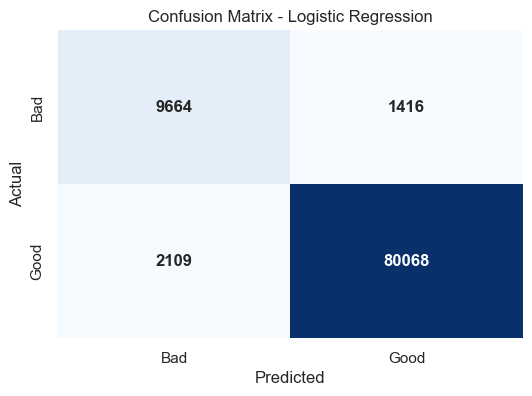

In [55]:
# Define and fit the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, solver='liblinear')
logreg_model.fit(X_train_resampled, y_train_resampled)

# Evaluation on test data
y_test_pred = logreg_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Bad', 'Good'])
test_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

print("Test Data Report - Logistic Regression:")
print(test_report)
print(f"Test ROC-AUC Score - Logistic Regression: {test_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

- Random Forrest Classifier

Test Data Report - Random Forest:
              precision    recall  f1-score   support

         Bad       0.81      0.83      0.82     11080
        Good       0.98      0.97      0.98     82177

    accuracy                           0.96     93257
   macro avg       0.89      0.90      0.90     93257
weighted avg       0.96      0.96      0.96     93257

Test ROC-AUC Score - Random Forest: 0.9620



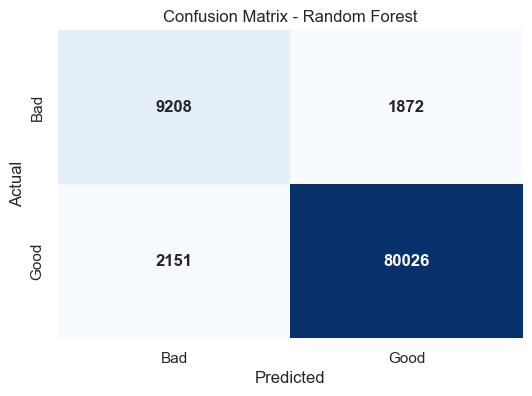

In [56]:
# Define and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluation on test data
y_test_pred = rf_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Bad', 'Good'])
test_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("Test Data Report - Random Forest:")
print(test_report)
print(f"Test ROC-AUC Score - Random Forest: {test_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

- Gradient Boosting Classifier

Test Data Report - Gradient Boosting:
              precision    recall  f1-score   support

         Bad       0.86      0.81      0.83     11080
        Good       0.97      0.98      0.98     82177

    accuracy                           0.96     93257
   macro avg       0.92      0.89      0.90     93257
weighted avg       0.96      0.96      0.96     93257

Test ROC-AUC Score - Gradient Boosting: 0.9570



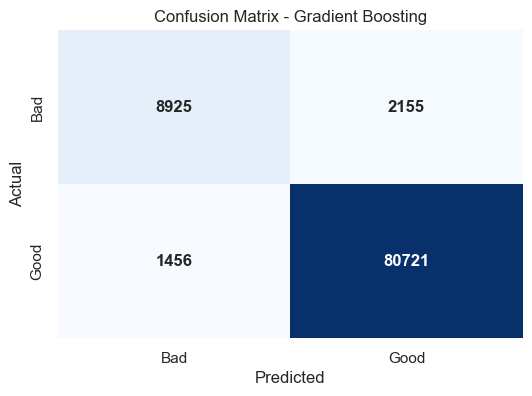

In [57]:
# Define and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Evaluation on test data
y_test_pred = gb_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Bad', 'Good'])
test_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

print("Test Data Report - Gradient Boosting:")
print(test_report)
print(f"Test ROC-AUC Score - Gradient Boosting: {test_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

- XGBoost Classifier

Test Data Report - XGBClassifier:
              precision    recall  f1-score   support

         Bad       0.89      0.89      0.89     11080
        Good       0.99      0.99      0.99     82177

    accuracy                           0.97     93257
   macro avg       0.94      0.94      0.94     93257
weighted avg       0.97      0.97      0.97     93257

Test ROC-AUC Score - XGBClassifier: 0.9844



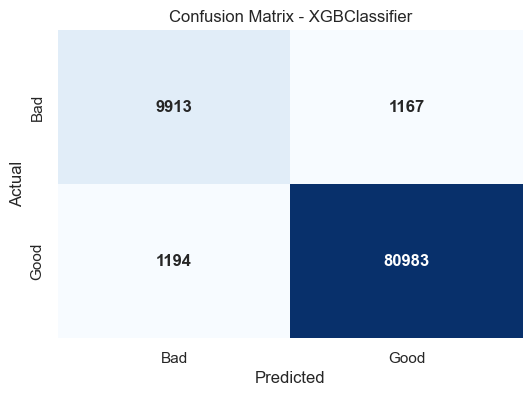

In [58]:
# Define and fit the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Evaluation on test data
y_test_pred = xgb_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Bad', 'Good'])
test_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("Test Data Report - XGBClassifier:")
print(test_report)
print(f"Test ROC-AUC Score - XGBClassifier: {test_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBClassifier')
plt.show()

- LightGBM Classifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44252, number of negative: 44252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4591
[LightGBM] [Info] Number of data points in the train set: 88504, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test Data Report - LightGBM:
              precision    recall  f1-score   support

         Bad       0.92      0.87      0.89     11080
        Good       0.98      0.99      0.99     82177

    accuracy                           0.98     93257
   macro avg       0.95      0.93      0.94     93257
weighted avg       0.97      0.98      0.98     93257

Test ROC-AUC Score - LightGBM: 0.9817



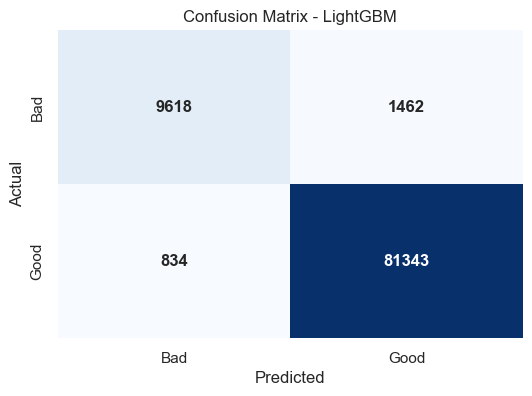

In [59]:
# Define and fit the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Evaluation on test data
y_test_pred = lgbm_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Bad', 'Good'])
test_roc_auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])

print("Test Data Report - LightGBM:")
print(test_report)
print(f"Test ROC-AUC Score - LightGBM: {test_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()


- Catboost Classifier

Test Data Report - CatBoost:
              precision    recall  f1-score   support

         Bad       0.93      0.90      0.91     11080
        Good       0.99      0.99      0.99     82177

    accuracy                           0.98     93257
   macro avg       0.96      0.94      0.95     93257
weighted avg       0.98      0.98      0.98     93257

Test ROC-AUC Score - CatBoost: 0.9872



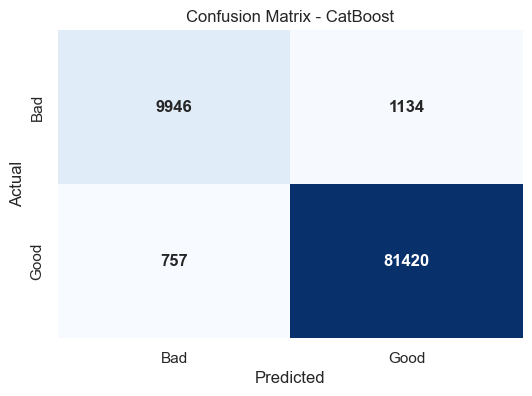

In [60]:
# Define and fit the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train_resampled, y_train_resampled)

# Evaluation on test data
y_test_pred = catboost_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Bad', 'Good'])
test_roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])

print("Test Data Report - CatBoost:")
print(test_report)
print(f"Test ROC-AUC Score - CatBoost: {test_roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()

Best Model Selection

Based on the evaluation metrics, **CatBoost** achieves the highest ROC-AUC score on both cross-validation and the test set. It also shows competitive performance in terms of precision, recall, and F1-score, indicating robustness across different metrics.

Performance Comparison

- **CatBoost** shows consistent high performance across all metrics, with a particularly strong ROC-AUC score of 0.9872 on the test set, indicating excellent discriminatory power.
- **XGBoost** also performs well with a high ROC-AUC score of 0.9844 and balanced precision and recall scores.
- **LightGBM** follows closely with a ROC-AUC score of 0.9817 and high precision, although its recall is slightly lower compared to CatBoost and XGBoost.

Overfitting or Underfitting Analysis

- **Overfitting**: Overfitting occurs when a model performs significantly better on the training set than on the test set. This is indicated by a large discrepancy between training and test performance metrics. None of the models here show a clear sign of overfitting as their test performance remains competitive and close to their training performance.

- **Underfitting**: Underfitting happens when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and test sets. This is not observed in the models evaluated here as they generally show good performance on both training (cross-validation) and test data.

Due to its high performance, **CatBoost and XGBoost will be selected for further hyperparameter tuning** to potentially enhance its performance even further.

## **HYPERPARAMETER TUNING**

Best Parameters found on training set:
{'depth': 8, 'iterations': 400, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

Best Cross-Validation ROC-AUC Score: 0.9870

Test Data Report - CatBoost (Best Model):
              precision    recall  f1-score   support

         Bad       0.93      0.90      0.91     11080
        Good       0.99      0.99      0.99     82177

    accuracy                           0.98     93257
   macro avg       0.96      0.94      0.95     93257
weighted avg       0.98      0.98      0.98     93257

Test ROC-AUC Score - CatBoost: 0.9864


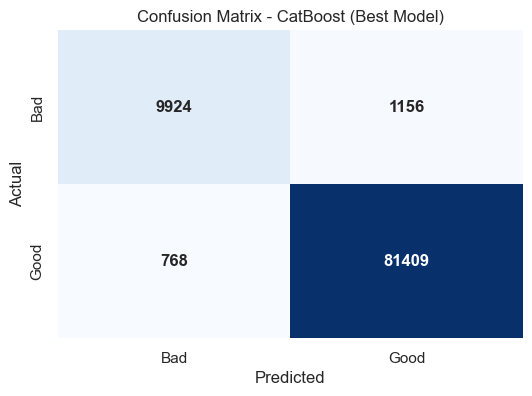

In [61]:
# Define the CatBoost classifier
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Perform GridSearchCV with ROC-AUC scoring
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters found on training set:")
print(grid_search.best_params_)
print("\nBest Cross-Validation ROC-AUC Score: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Bad', 'Good'])
test_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("\nTest Data Report - CatBoost (Best Model):")
print(test_report)
print(f"Test ROC-AUC Score - CatBoost: {test_roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost (Best Model)')
plt.show()

#### Model Selection Analysis

Before Hyperparameter Tuning: The initial CatBoost model without hyperparameter tuning achieved impressive results on the test dataset:
- **Precision**: 0.93 for 'Bad' class, 0.99 for 'Good' class
- **Recall**: 0.90 for 'Bad' class, 0.99 for 'Good' class
- **F1-score**: 0.91 for 'Bad' class, 0.99 for 'Good' class
- **ROC-AUC Score**: 0.9872

This model demonstrated high accuracy and robust performance across all evaluation metrics.

After Hyperparameter Tuning: After tuning hyperparameters using GridSearchCV, the CatBoost model achieved slightly lower performance metrics compared to the initial model:
- **Precision**: 0.93 for 'Bad' class, 0.99 for 'Good' class
- **Recall**: 0.90 for 'Bad' class, 0.99 for 'Good' class
- **F1-score**: 0.91 for 'Bad' class, 0.99 for 'Good' class
- **ROC-AUC Score**: 0.9864

While the difference in performance metrics is marginal, the tuned model exhibits a slightly lower ROC-AUC score compared to the initial model.

Conclusion
Choosing between the model before and after hyperparameter tuning depends on the specific context and requirements:
- **Before Tuning**: Offers excellent performance out-of-the-box with minimal computational overhead, suitable for scenarios where quick deployment and high initial performance are crucial.
- **After Tuning**: Provides marginally refined performance metrics after optimizing hyperparameters, albeit with increased computational complexity and time investment during tuning.

In this case, considering the marginal difference in ROC-AUC scores and the initial model's strong performance, the **`model before hyperparameter tuning may be preferred for its simplicity and high initial effectiveness`**.

## **TOP 10 FEATURES IN THE MODEL**

In [62]:
# Get feature importance
feature_importance = catboost_model.feature_importances_

# Create DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance and select top 10 features
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print top 10 features
print("Top 10 Feature Importance - CatBoost (Before Tuning):\n")
print(top_10_features)

Top 10 Feature Importance - CatBoost (Before Tuning):

                        Feature  Importance
12                  total_pymnt   23.096407
0                     loan_amnt   19.943766
15                   recoveries   16.471283
11                    out_prncp   15.336849
16              last_pymnt_amnt   10.949517
23  days_since_last_credit_pull    7.090433
28               term_36 months    1.521409
13                total_rec_int    0.918225
1                      int_rate    0.879224
29               term_60 months    0.871362


C:\Users\ahmad\AppData\Local\Temp\ipykernel_13920\1753357128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


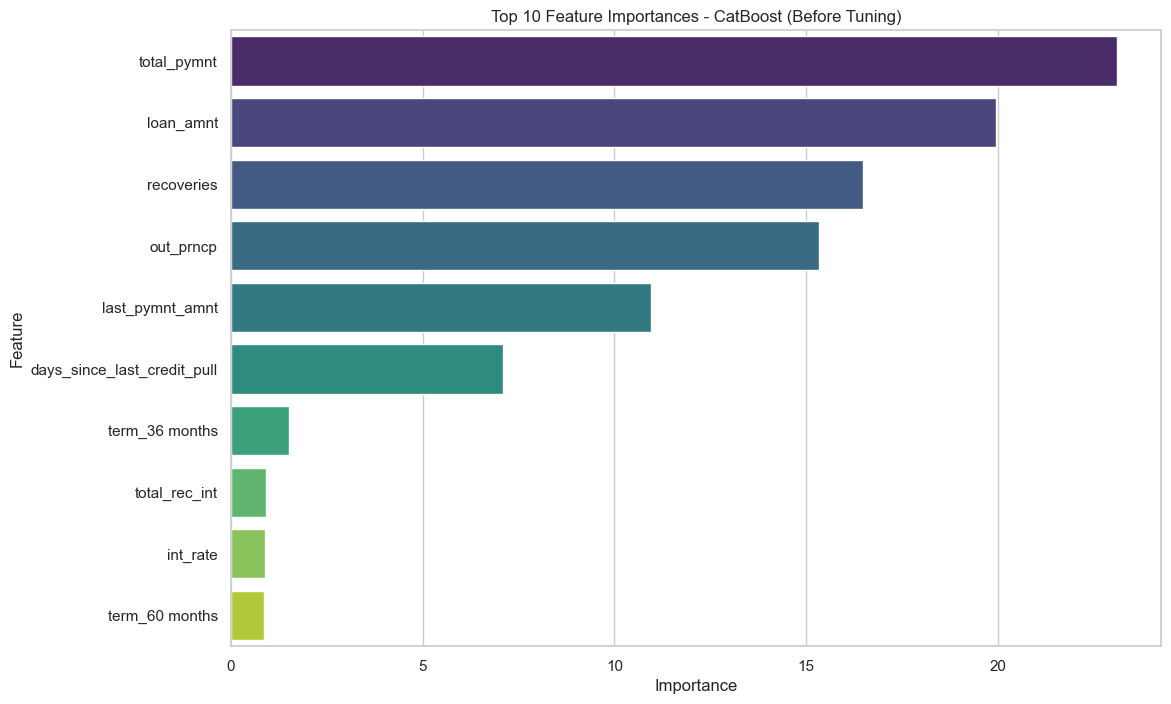

In [63]:
# Plotting the top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importances - CatBoost (Before Tuning)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()